In [2]:
#Imports
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats
#from pandas.util.testing import assert_frame_equal
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from pylab import rcParams
%config InlineBackend.figure_format='retina'
#sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
#sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 2 # I'm seeding with 2, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)

In [3]:
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf

In [4]:
GOOG = yf.download("GOOG", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Google
AAPL = yf.download("AAPL", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Apple
META = yf.download("META", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Facebook
AMZN = yf.download("AMZN", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Amazon
MSFT = yf.download("MSFT", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of Microsoft
GSPC = yf.download("^GSPC", start="2012-05-18", end="2023-01-01",group_by="ticker") # Stock of S&P 500
print(GOOG.shape, AAPL.shape, META.shape, AMZN.shape,MSFT.shape,GSPC.shape)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

(2673, 5) (2673, 5) (2673, 5) (2673, 5) (2673, 5) (2673, 5)


In [5]:
GOOG

Ticker           GOOG                                            
Price            Open       High        Low      Close     Volume
Date                                                             
2012-05-18  15.463325  15.644403  14.760784  14.852312  239835606
2012-05-21  14.855032  15.230546  14.842415  15.191460  123477094
2012-05-22  15.174886  15.184038  14.743466  14.862206  122533571
2012-05-23  14.883232  15.079895  14.771173  15.076431  127600492
2012-05-24  15.069010  15.137286  14.814464  14.932956   75935562
...               ...        ...        ...        ...        ...
2022-12-23  87.024467  89.487607  87.024467  89.199577   17815000
2022-12-27  88.702993  88.891704  86.940063  87.332375   15470900
2022-12-28  86.905285  87.918349  85.782968  85.872353   17879600
2022-12-29  86.438480  88.757609  86.398751  88.345428   18280700
2022-12-30  86.771202  88.226249  86.438480  88.126930   19190300

[2673 rows x 5 columns]

In [6]:
#GSPC.to_csv('GSPC.csv', index=False)
#GSPC['^GSPC']['Close']
#GSPC['^GSPC'].Close
GSPC

Ticker            ^GSPC                                                   
Price              Open         High          Low        Close      Volume
Date                                                                      
2012-05-18  1305.050049  1312.239990  1291.979980  1295.219971  4512470000
2012-05-21  1295.729980  1316.390015  1295.729980  1315.989990  3786750000
2012-05-22  1316.089966  1328.489990  1310.040039  1316.630005  4123680000
2012-05-23  1316.020020  1320.709961  1296.530029  1318.859985  4108330000
2012-05-24  1318.719971  1324.140015  1310.500000  1320.680054  3937670000
...                 ...          ...          ...          ...         ...
2022-12-23  3815.110107  3845.800049  3797.010010  3844.820068  2819280000
2022-12-27  3843.340088  3846.649902  3813.219971  3829.250000  3030300000
2022-12-28  3829.560059  3848.320068  3780.780029  3783.219971  3083520000
2022-12-29  3805.449951  3858.189941  3805.449951  3849.280029  3003680000
2022-12-30  3829.060059  3839.850098  3800.340088  3839.500000  2979870000

[2673 rows x 5 columns]

In [7]:
GOOG.isnull().sum()

Ticker  Price 
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
dtype: int64

In [8]:
#Combining dataframes
dataset = pd.concat([GOOG['GOOG'].Close, AAPL['AAPL'].Close,META['META'].Close,AMZN['AMZN'].Close, MSFT['MSFT'].Close,GSPC['^GSPC'].Close],axis=1)
# Change the column names
dataset.columns =['GOOG', 'AAPL', 'META','AMZN','MSFT','GSPC']
dataset.head()

GOOG       AAPL       META     AMZN       MSFT         GSPC
Date                                                                        
2012-05-18  14.852312  15.922066  37.995770  10.6925  23.269146  1295.219971
2012-05-21  15.191460  16.849691  33.821499  10.9055  23.650742  1315.989990
2012-05-22  14.862206  16.720299  30.810064  10.7665  23.658686  1316.630005
2012-05-23  15.076431  17.128283  31.803940  10.8640  23.141945  1318.859985
2012-05-24  14.932956  16.970970  32.827625  10.7620  23.110153  1320.680054

In [9]:
print('Shape of data',dataset.shape)

Shape of data (2673, 6)


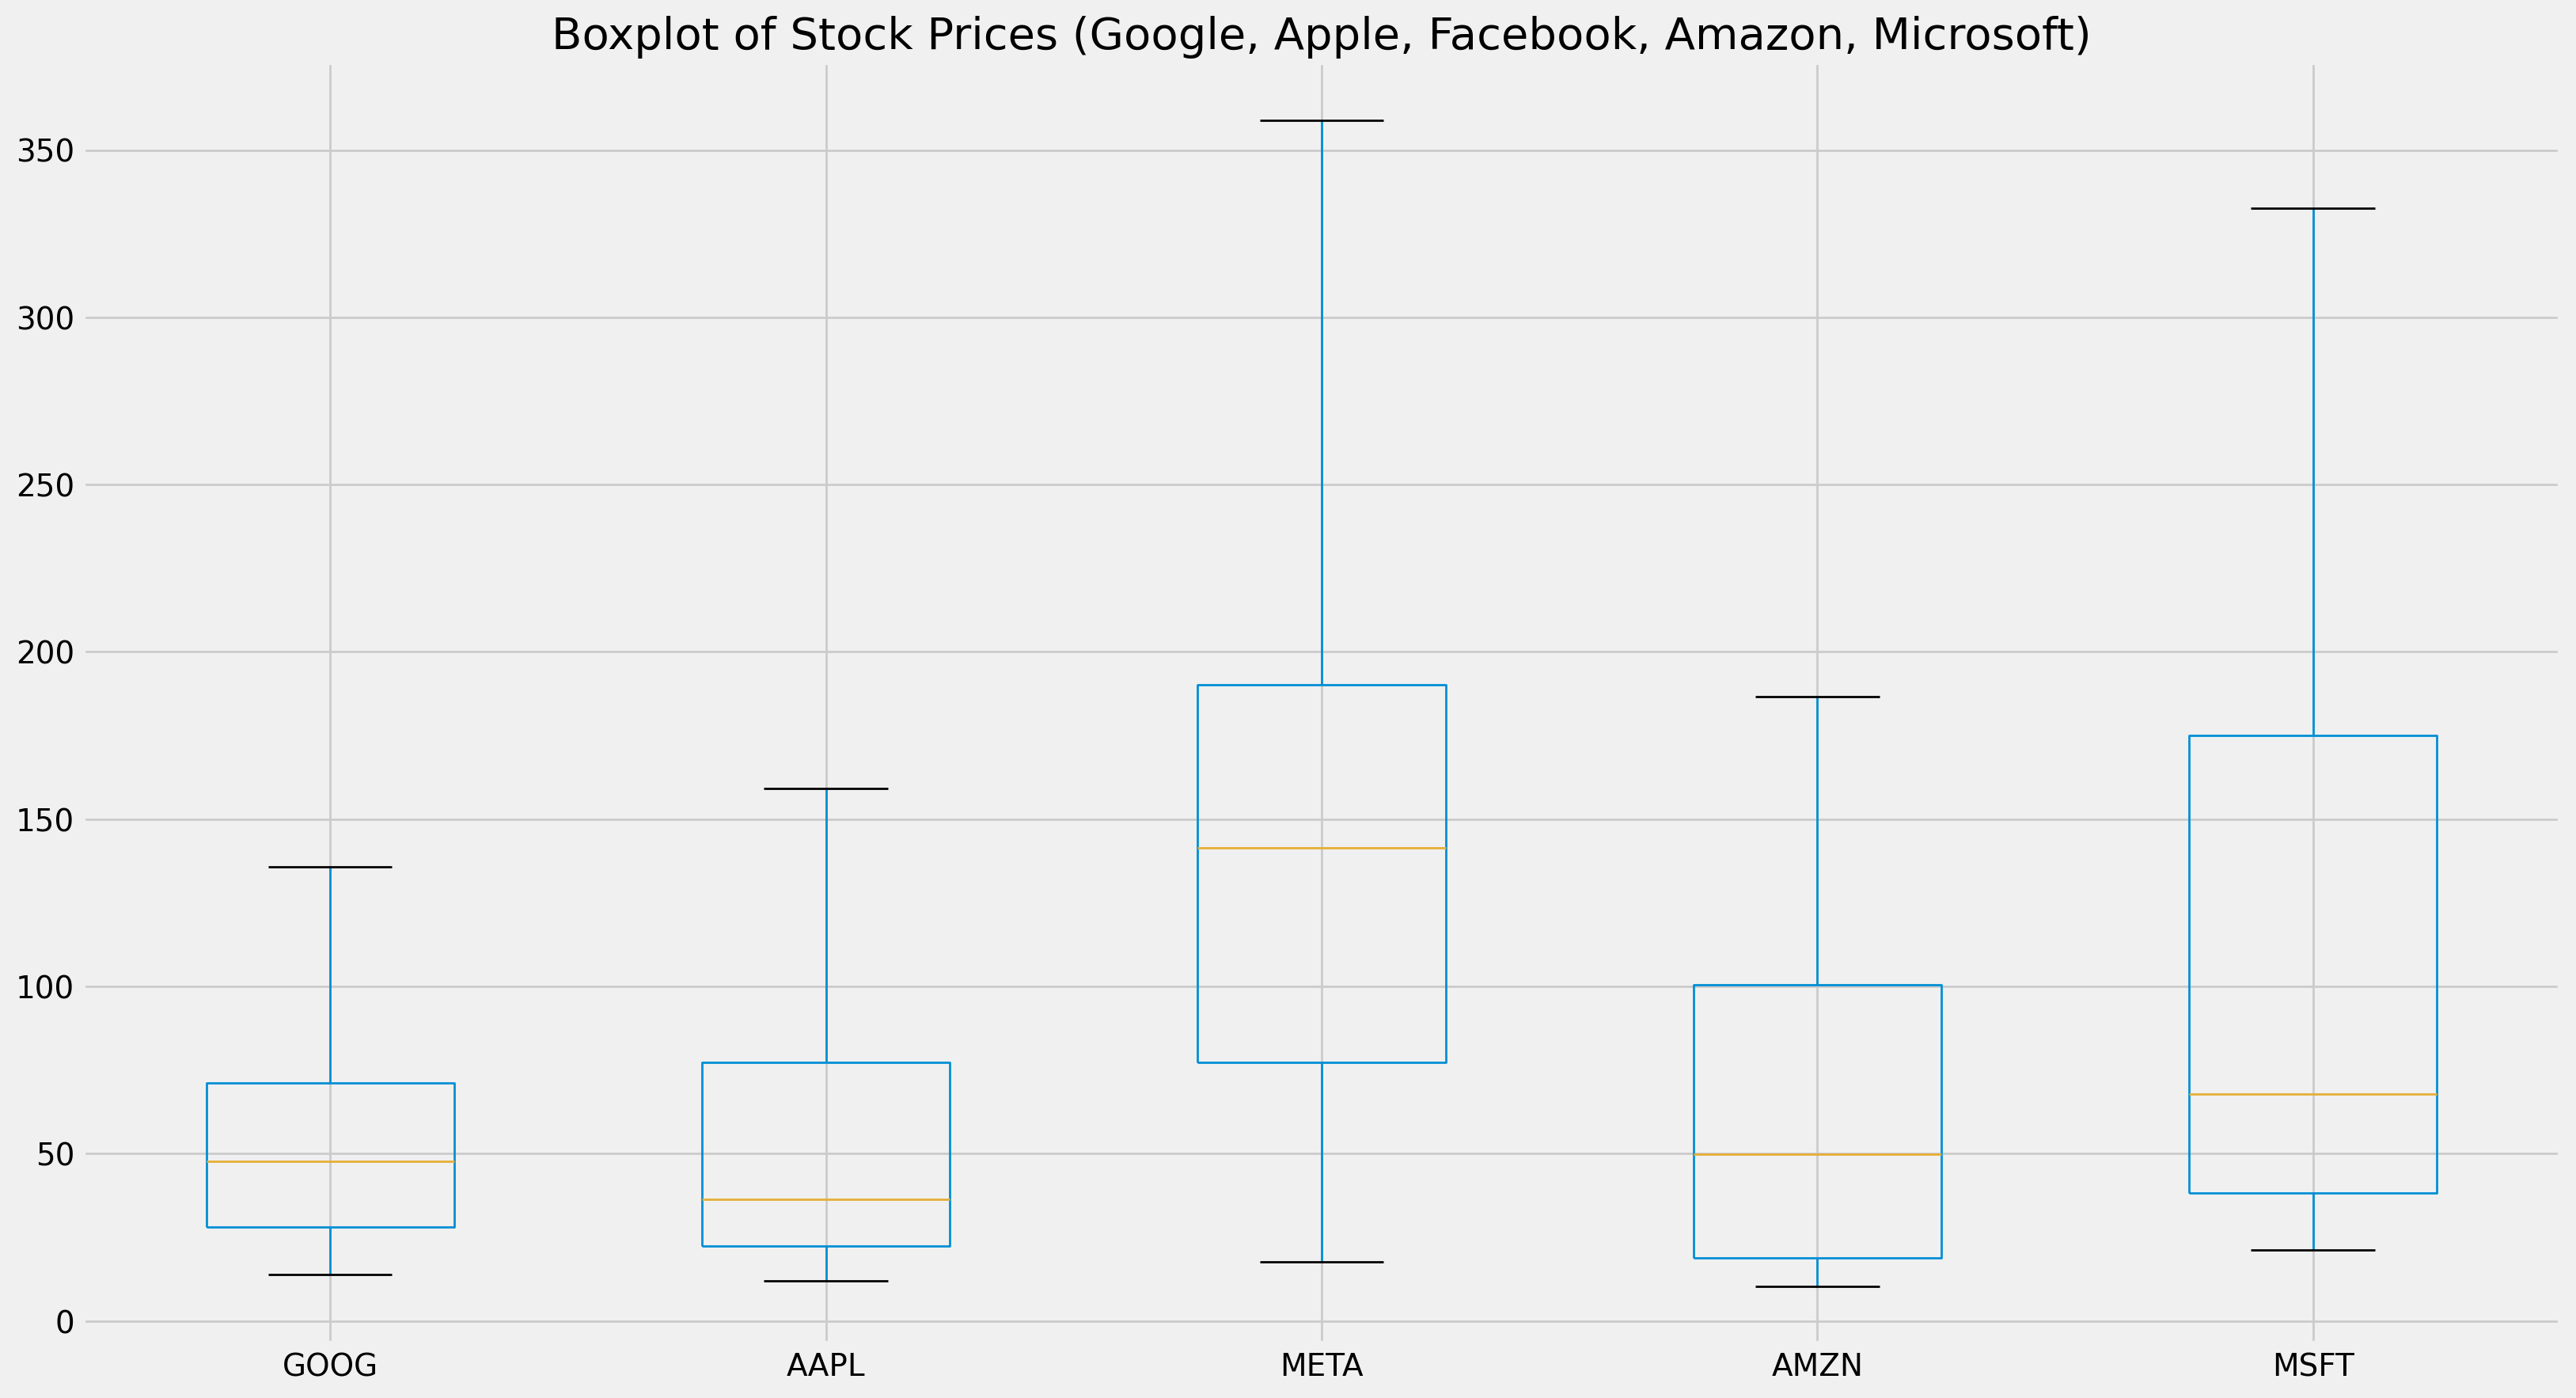

In [10]:
plt.style.use("fivethirtyeight")
dataset[['GOOG','AAPL','META','AMZN','MSFT']].boxplot(sym="")
plt.title("Boxplot of Stock Prices (Google, Apple, Facebook, Amazon, Microsoft)")
plt.show()

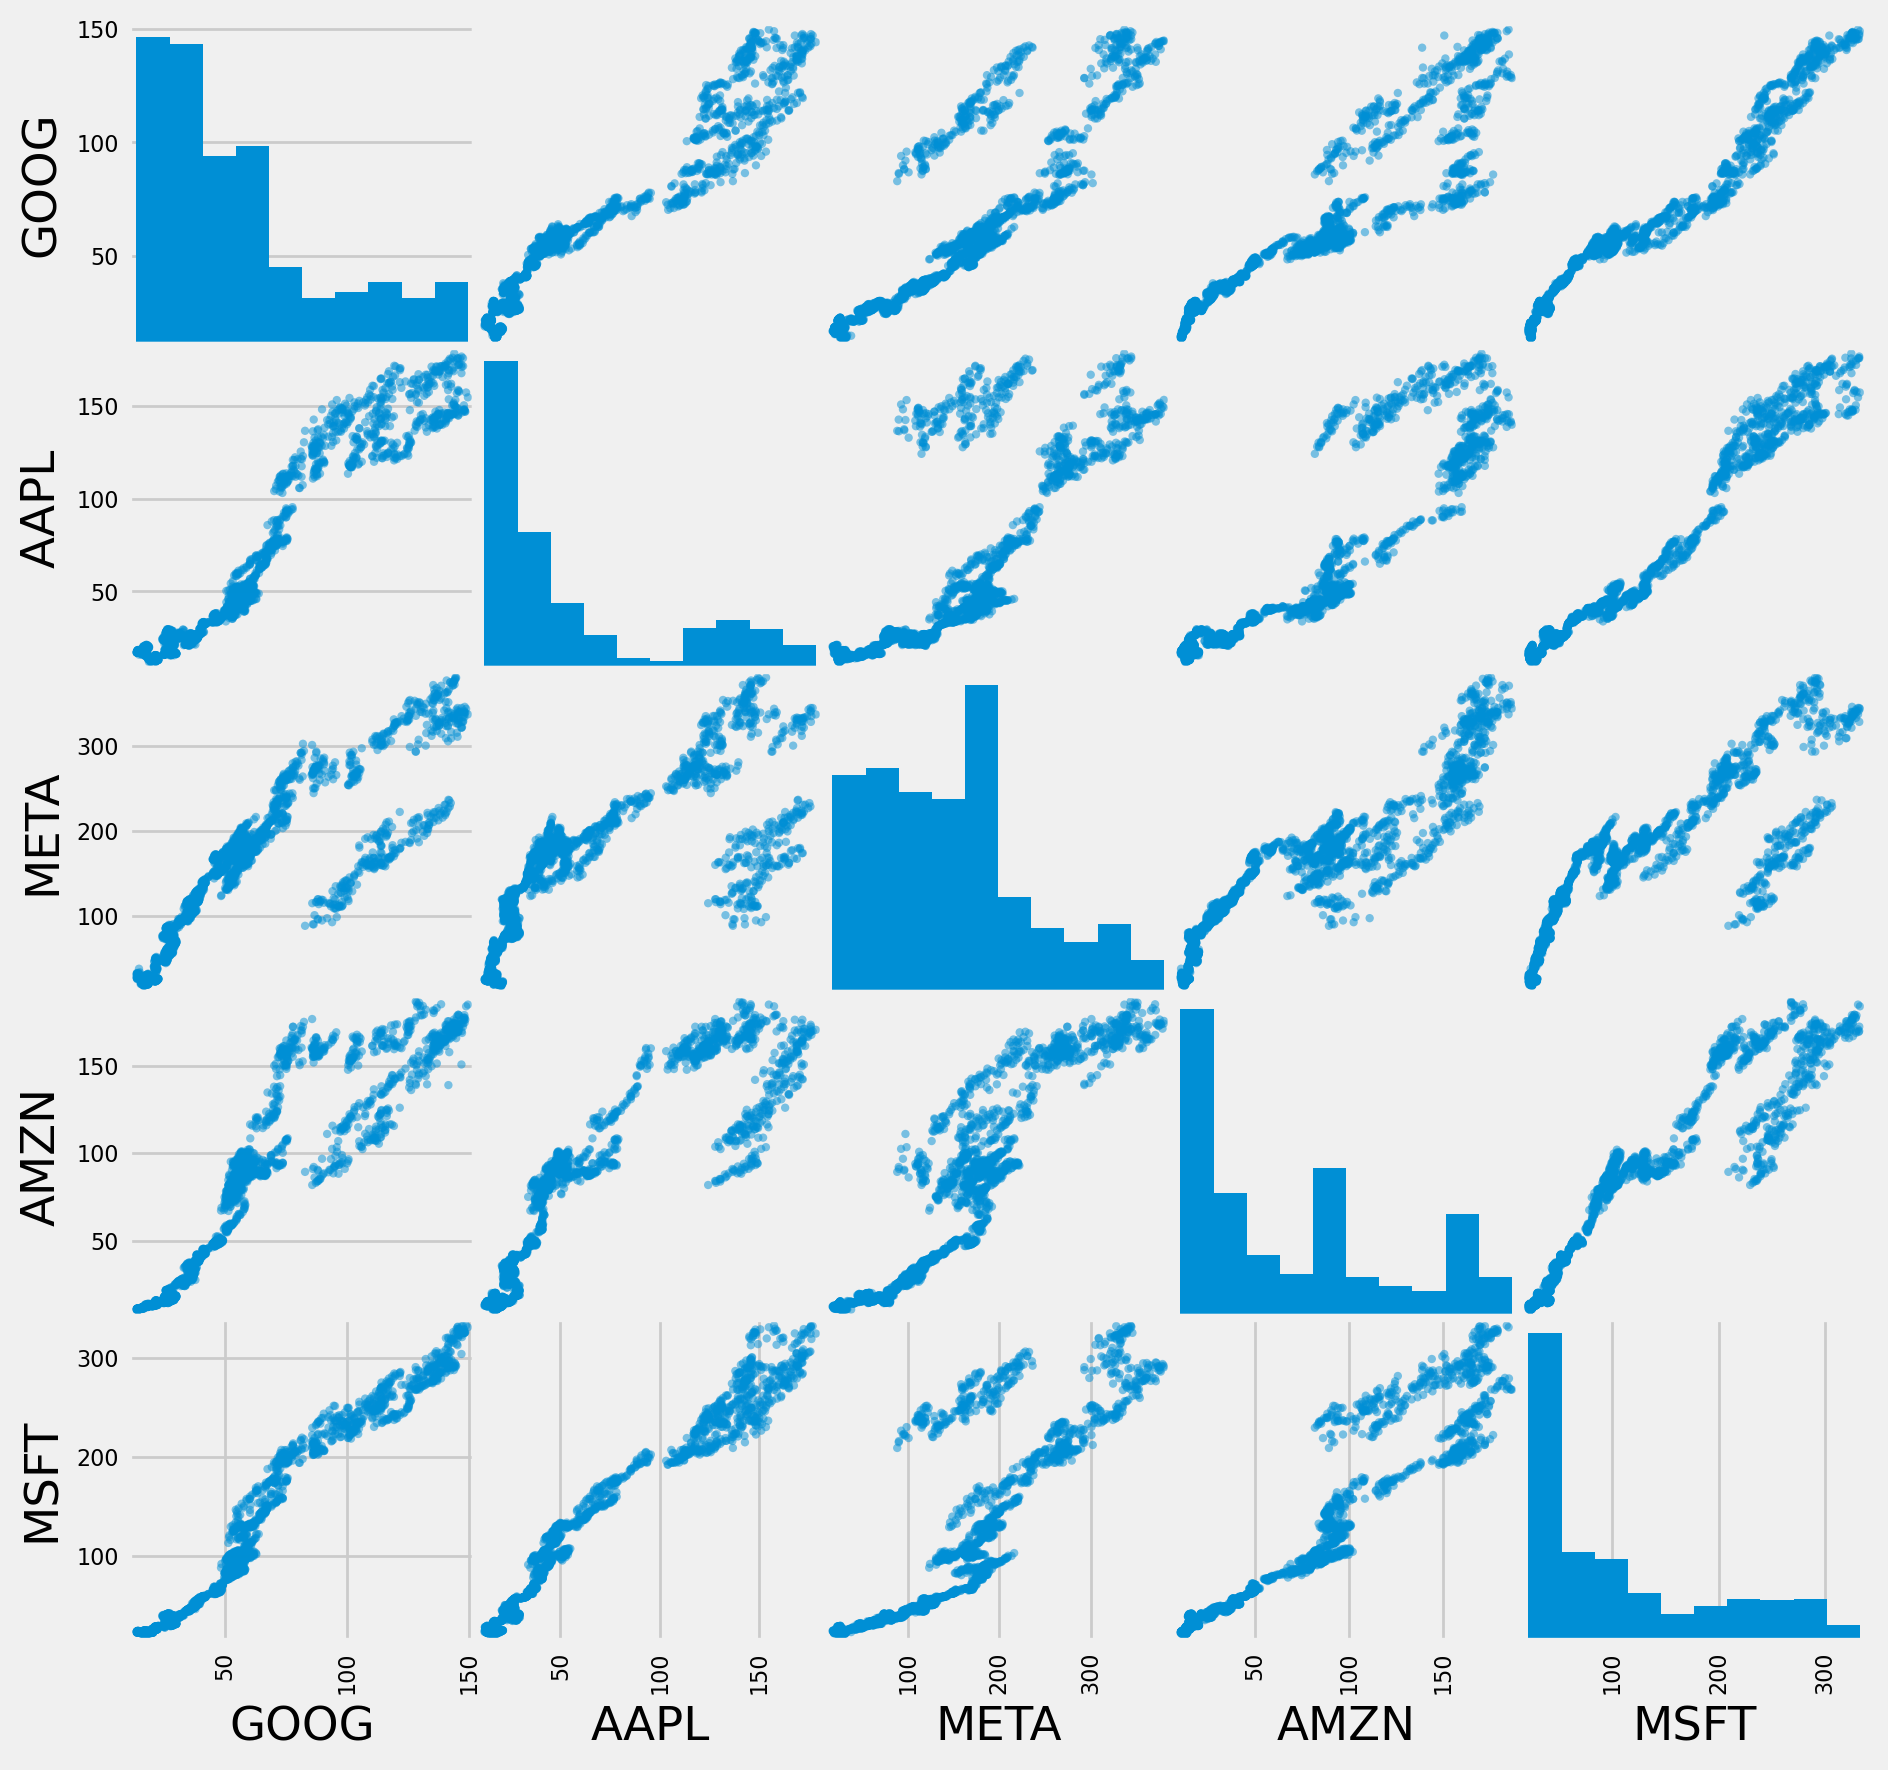

In [11]:
#dataset.hist(figsize=(10,10))
pd.plotting.scatter_matrix(dataset[['GOOG','AAPL','META','AMZN','MSFT']], figsize=(10,10))
plt.show()

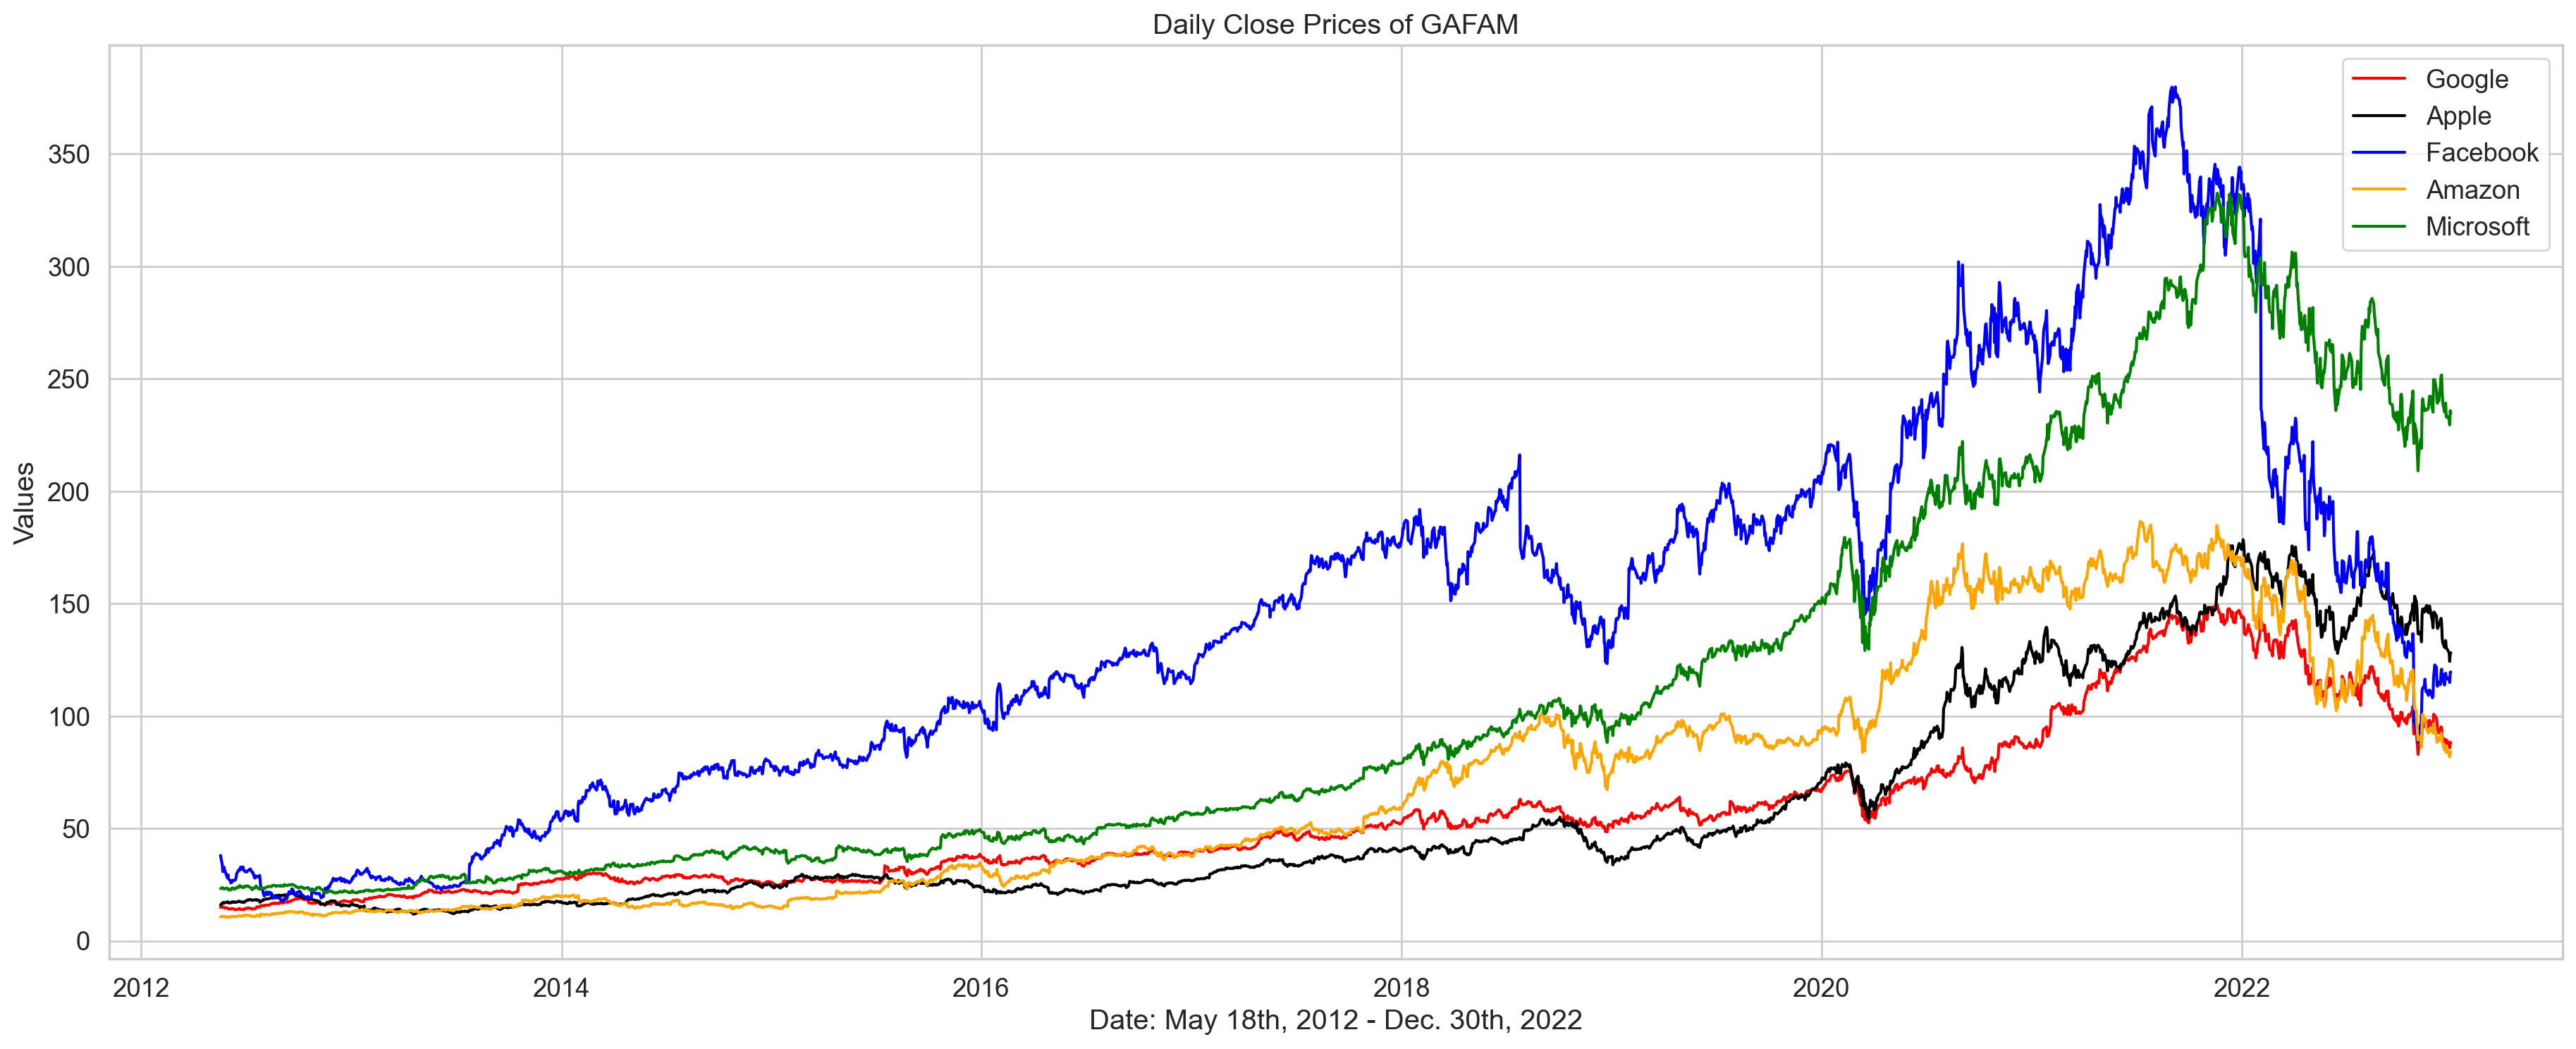

In [12]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of GAFAM')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GOOG'], 'red', label='Google')
plt.plot(dataset['AAPL'], 'black', label='Apple')
plt.plot(dataset['META'], 'blue', label='Facebook')
plt.plot(dataset['AMZN'], 'orange', label='Amazon')
plt.plot(dataset['MSFT'], 'green', label='Microsoft')
plt.legend()
plt.show()

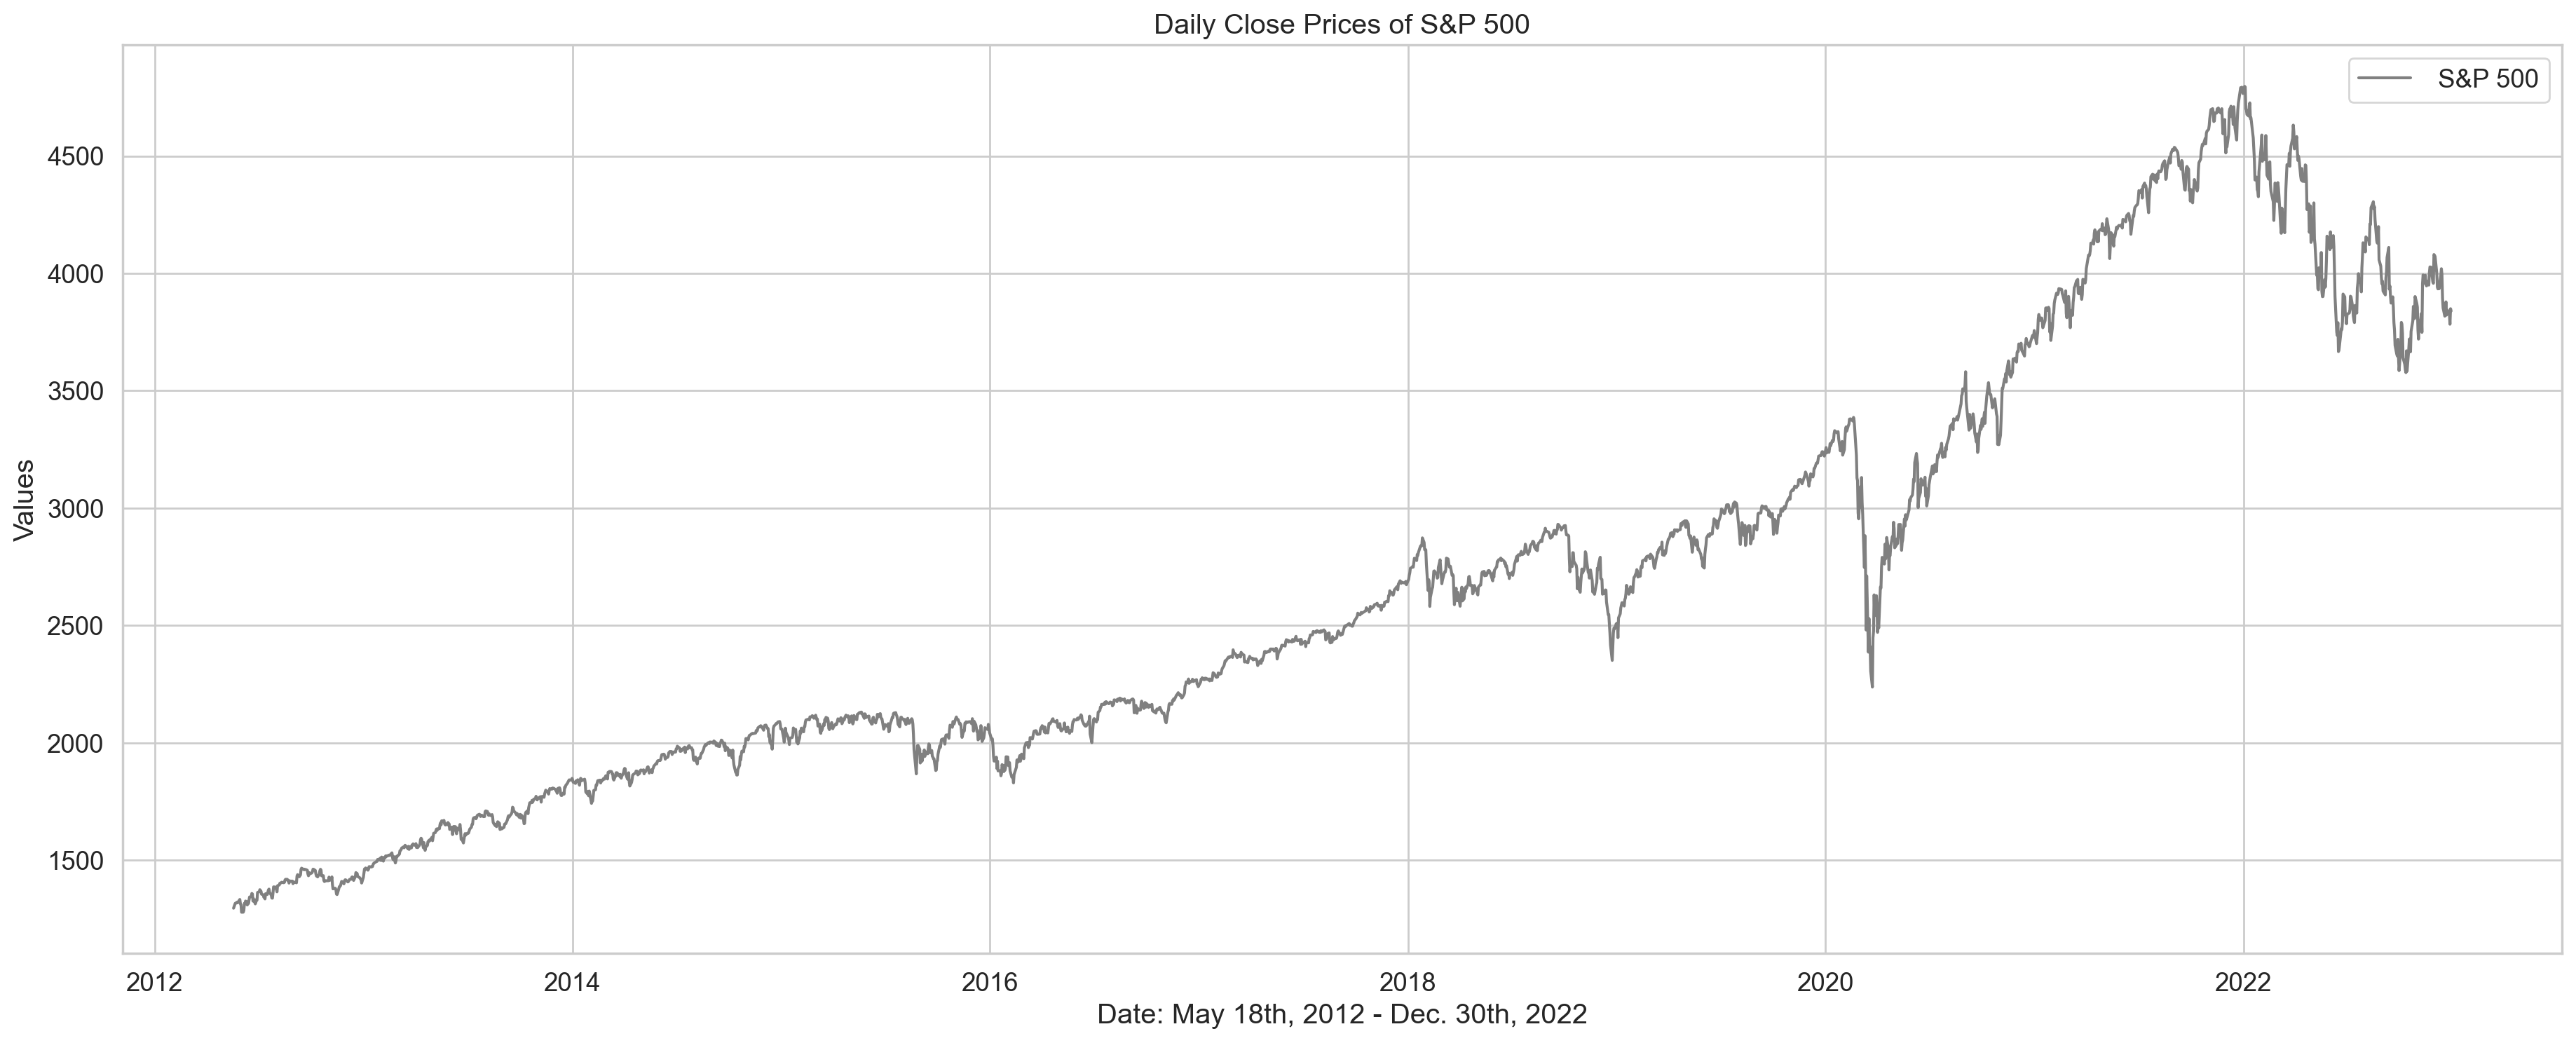

In [13]:
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of S&P 500')
plt.xlabel('Date: May 18th, 2012 - Dec. 30th, 2022')
plt.ylabel('Values')
plt.plot(dataset['GSPC'], 'grey', label=' S&P 500')
plt.legend()
plt.show()

In [14]:
#Create a new columns Return in the dataset for each company's
dataset['R_GOOG'] = dataset[['GOOG']].pct_change(1)
dataset['R_AAPL'] = dataset[['AAPL']].pct_change(1)
dataset['R_META'] = dataset[['META']].pct_change(1)
dataset['R_AMZN'] = dataset[['AMZN']].pct_change(1)
dataset['R_MSFT'] = dataset[['MSFT']].pct_change(1)
dataset['R_GSPC'] = dataset[['GSPC']].pct_change(1)
dataset.head

<bound method NDFrame.head of                  GOOG        AAPL        META       AMZN        MSFT  \
Date                                                                   
2012-05-18  14.852312   15.922066   37.995770  10.692500   23.269146   
2012-05-21  15.191460   16.849691   33.821499  10.905500   23.650742   
2012-05-22  14.862206   16.720299   30.810064  10.766500   23.658686   
2012-05-23  15.076431   17.128283   31.803940  10.864000   23.141945   
2012-05-24  14.932956   16.970970   32.827625  10.762000   23.110153   
...               ...         ...         ...        ...         ...   
2022-12-23  89.199577  130.026199  117.316780  85.250000  233.591858   
2022-12-27  87.332375  128.221649  116.163872  83.040001  231.859970   
2022-12-28  85.872353  124.287163  114.911606  81.820000  229.482254   
2022-12-29  88.345428  127.807503  119.523178  84.180000  235.822815   
2022-12-30  88.126930  128.123032  119.602684  84.000000  234.658401   

                   GSPC    R_GOOG

In [15]:
dataset.describe()

GOOG         AAPL         META         AMZN         MSFT  \
count  2673.000000  2673.000000  2673.000000  2673.000000  2673.000000   
mean     56.441729    57.378431   147.085174    70.188333   109.488406   
std      35.336733    48.130682    86.466090    53.709630    88.907811   
min      13.829420    11.896803    17.621368    10.411000    21.275986   
25%      28.049213    22.315800    77.353149    18.938499    38.323116   
50%      47.629559    36.421211   141.408264    49.758499    67.827988   
75%      71.104416    77.225578   190.117966   100.495003   174.926880   
max     149.684662   178.443115   379.838409   186.570496   332.608704   

              GSPC       R_GOOG       R_AAPL       R_META       R_AMZN  \
count  2673.000000  2672.000000  2672.000000  2672.000000  2672.000000   
mean   2664.394164     0.000809     0.000948     0.000751     0.000978   
std     904.069600     0.016898     0.018302     0.025274     0.020336   
min    1278.040039    -0.111008    -0.128647    -0.263901    -0.140494   
25%    1989.569946    -0.006764    -0.007586    -0.010112    -0.008609   
50%    2473.449951     0.000688     0.000752     0.000870     0.000916   
75%    3197.520020     0.008903     0.010503     0.012629     0.011109   
max    4796.560059     0.160524     0.119808     0.296115     0.141311   

            R_MSFT       R_GSPC  
count  2672.000000  2672.000000  
mean      0.001007     0.000467  
std       0.016839     0.010953  
min      -0.147390    -0.119841  
25%      -0.006684    -0.003640  
50%       0.000698     0.000594  
75%       0.009284     0.005426  
max       0.142169     0.093828

In [16]:
# Daily volatility (in %) of each stock
dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].std()

R_GOOG    0.016898
R_AAPL    0.018302
R_META    0.025274
R_AMZN    0.020336
R_MSFT    0.016839
R_GSPC    0.010953
dtype: float64

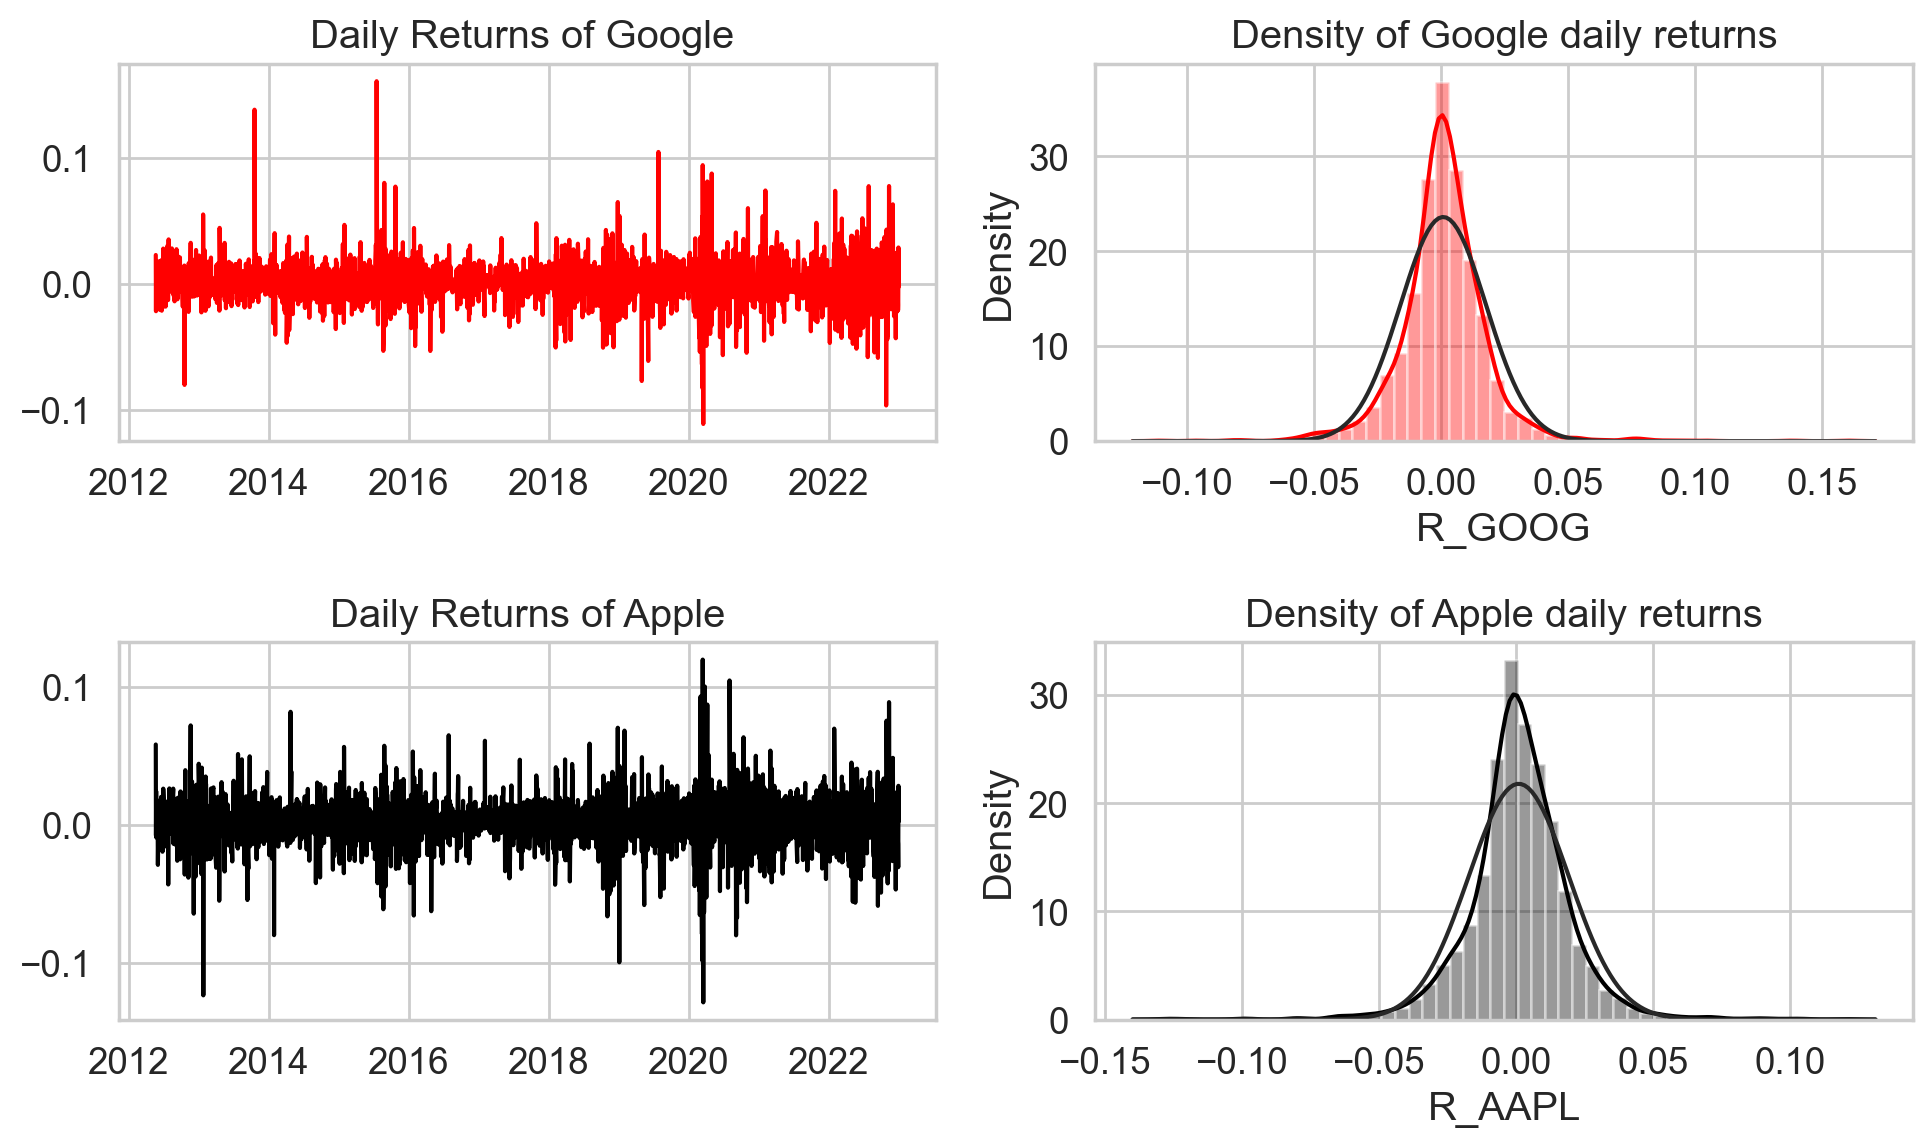

In [17]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))
    axes[0][0].plot(dataset['R_GOOG'], color='red')
    axes[0][0].set_title('Daily Returns of Google ')
    sns.distplot(dataset['R_GOOG'], norm_hist=True, fit=stats.norm, color='red',
    bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Google daily returns')
    axes[1][0].plot(dataset['R_AAPL'], color='black')
    axes[1][0].set_title('Daily Returns of Apple')
    sns.distplot(dataset['R_AAPL'], norm_hist=True, fit=stats.norm, color='black',
    bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Apple daily returns')
    plt.tight_layout()
    #fig.show()
    plt.show()

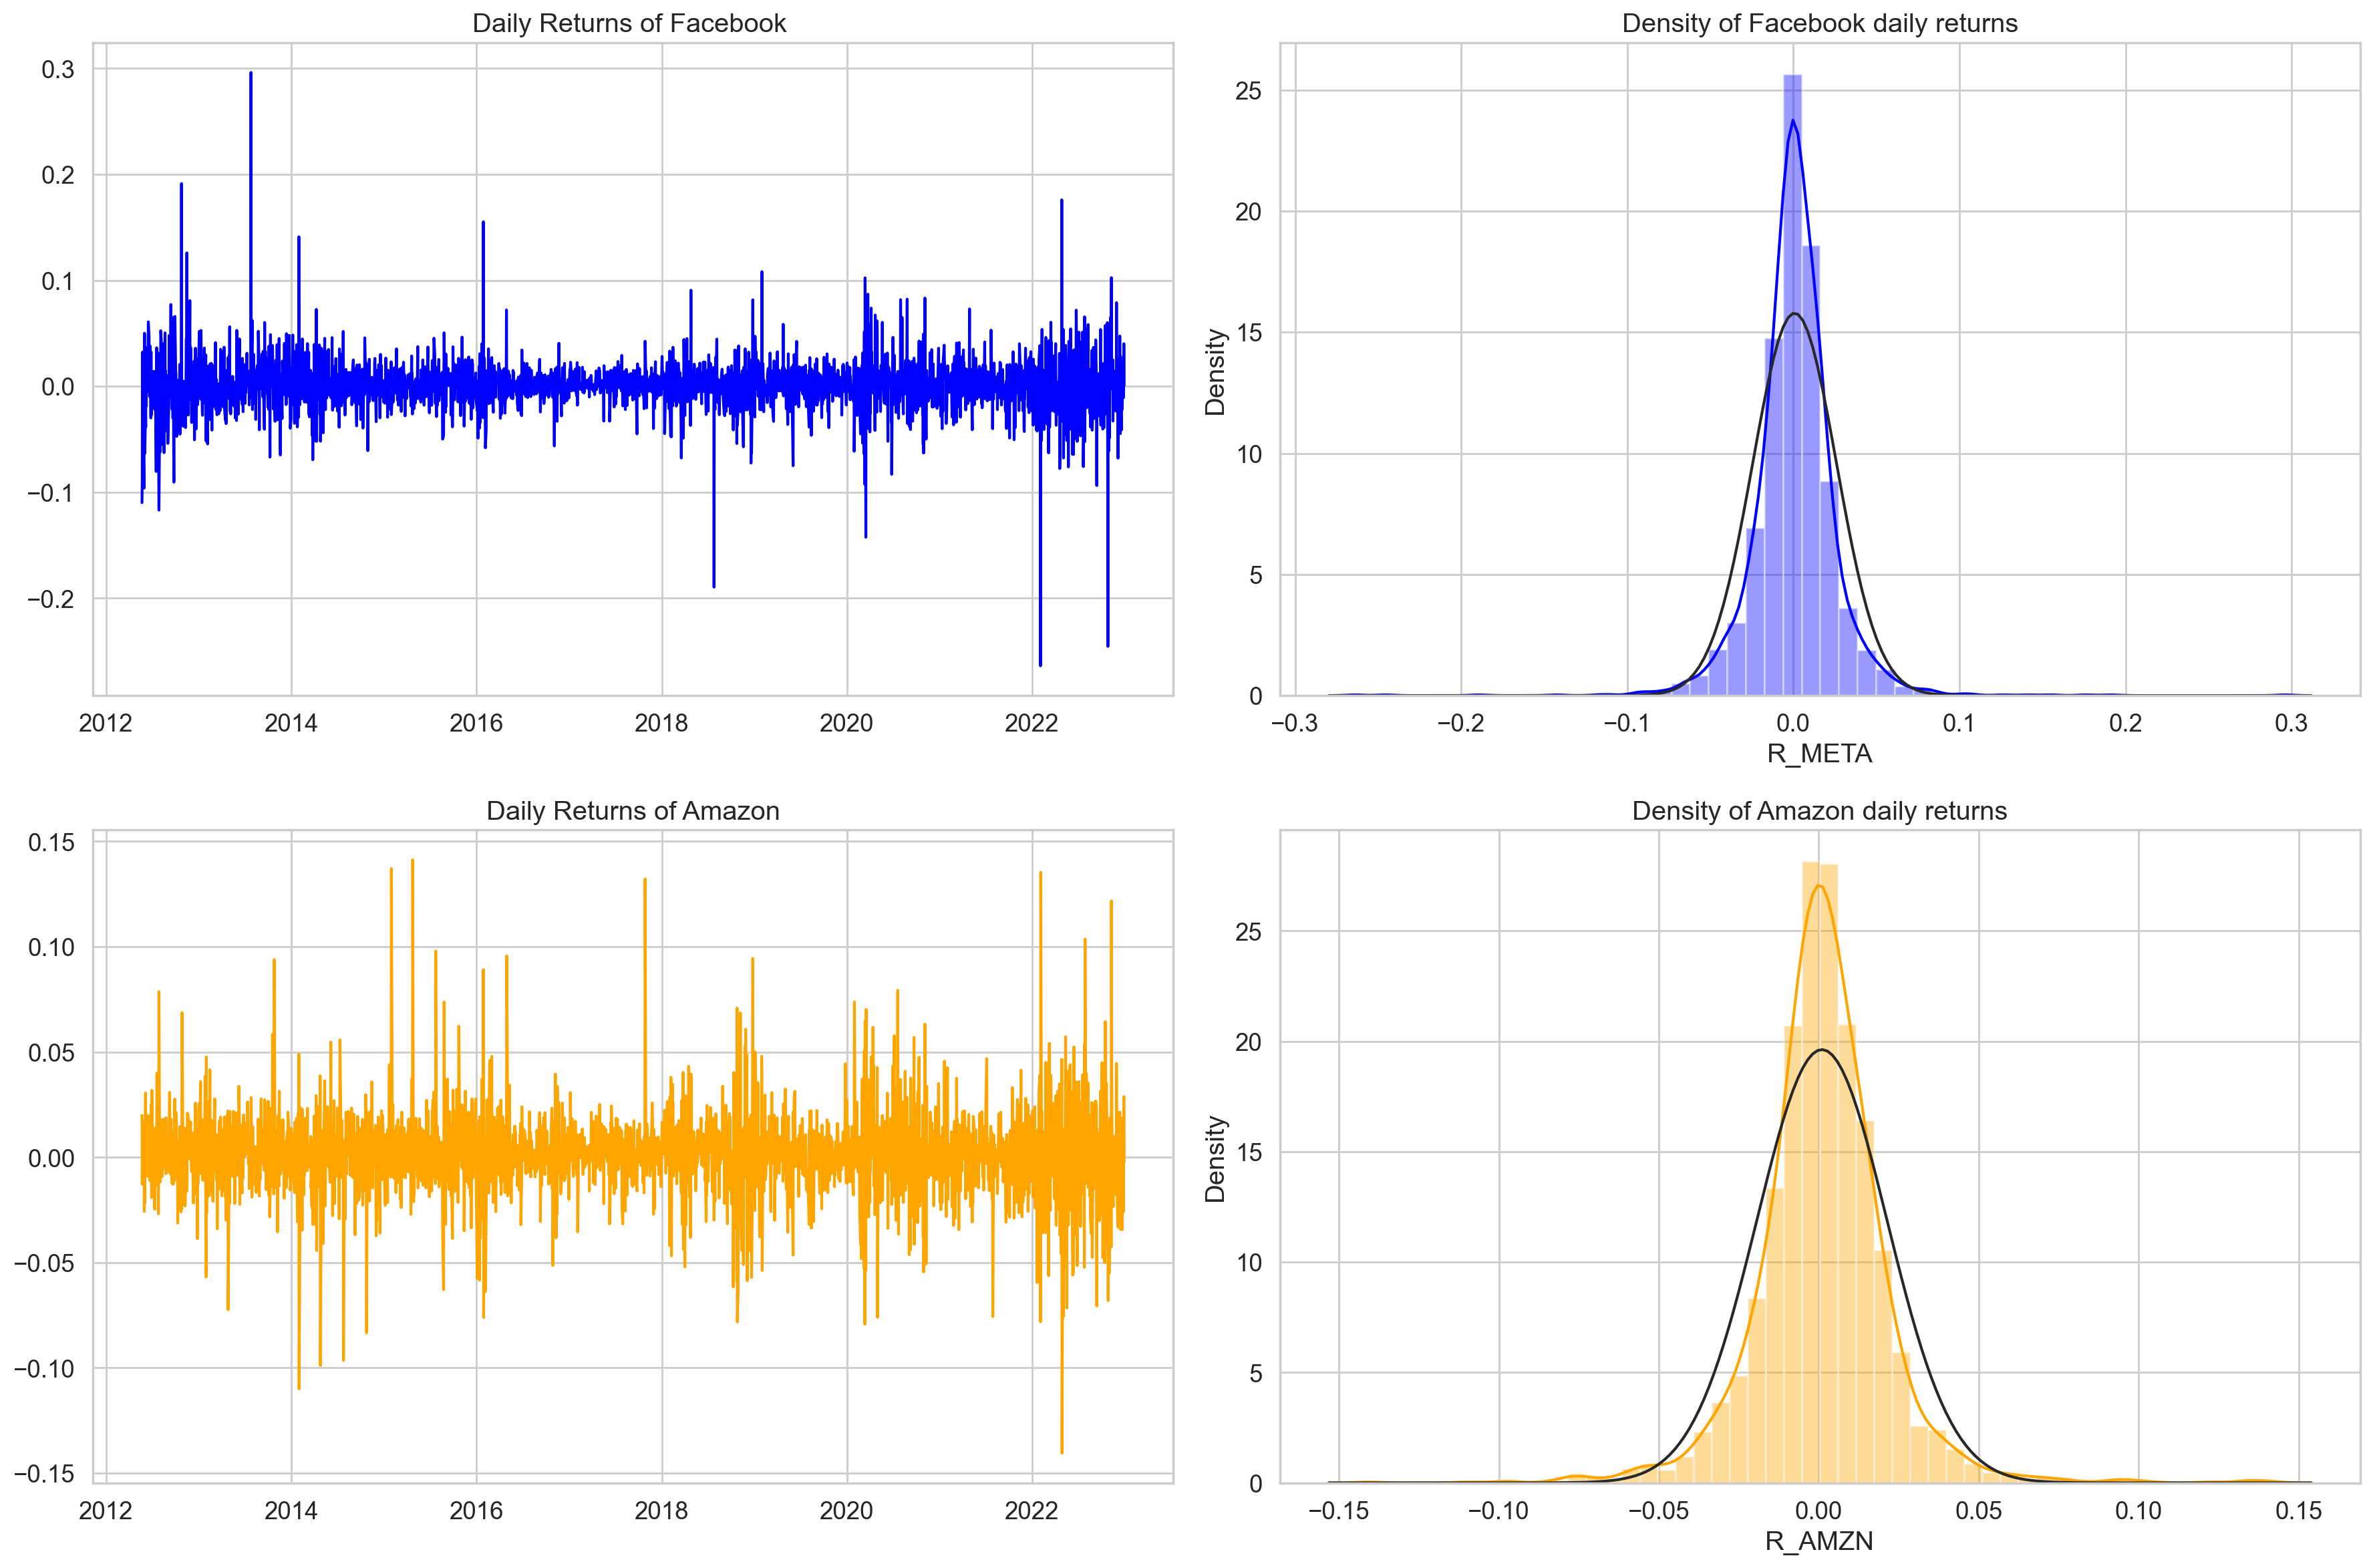

In [18]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
    axes[0][0].plot(dataset['R_META'], color='blue')
    axes[0][0].set_title('Daily Returns of Facebook ')
    sns.distplot(dataset['R_META'], norm_hist=True, fit=stats.norm, color='blue',
    bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Facebook daily returns')
    axes[1][0].plot(dataset['R_AMZN'], color='orange')
    axes[1][0].set_title('Daily Returns of Amazon')
    sns.distplot(dataset['R_AMZN'], norm_hist=True, fit=stats.norm, color='orange',
    bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of Amazon daily returns')
    plt.tight_layout()
    #fig.show();
    plt.show()

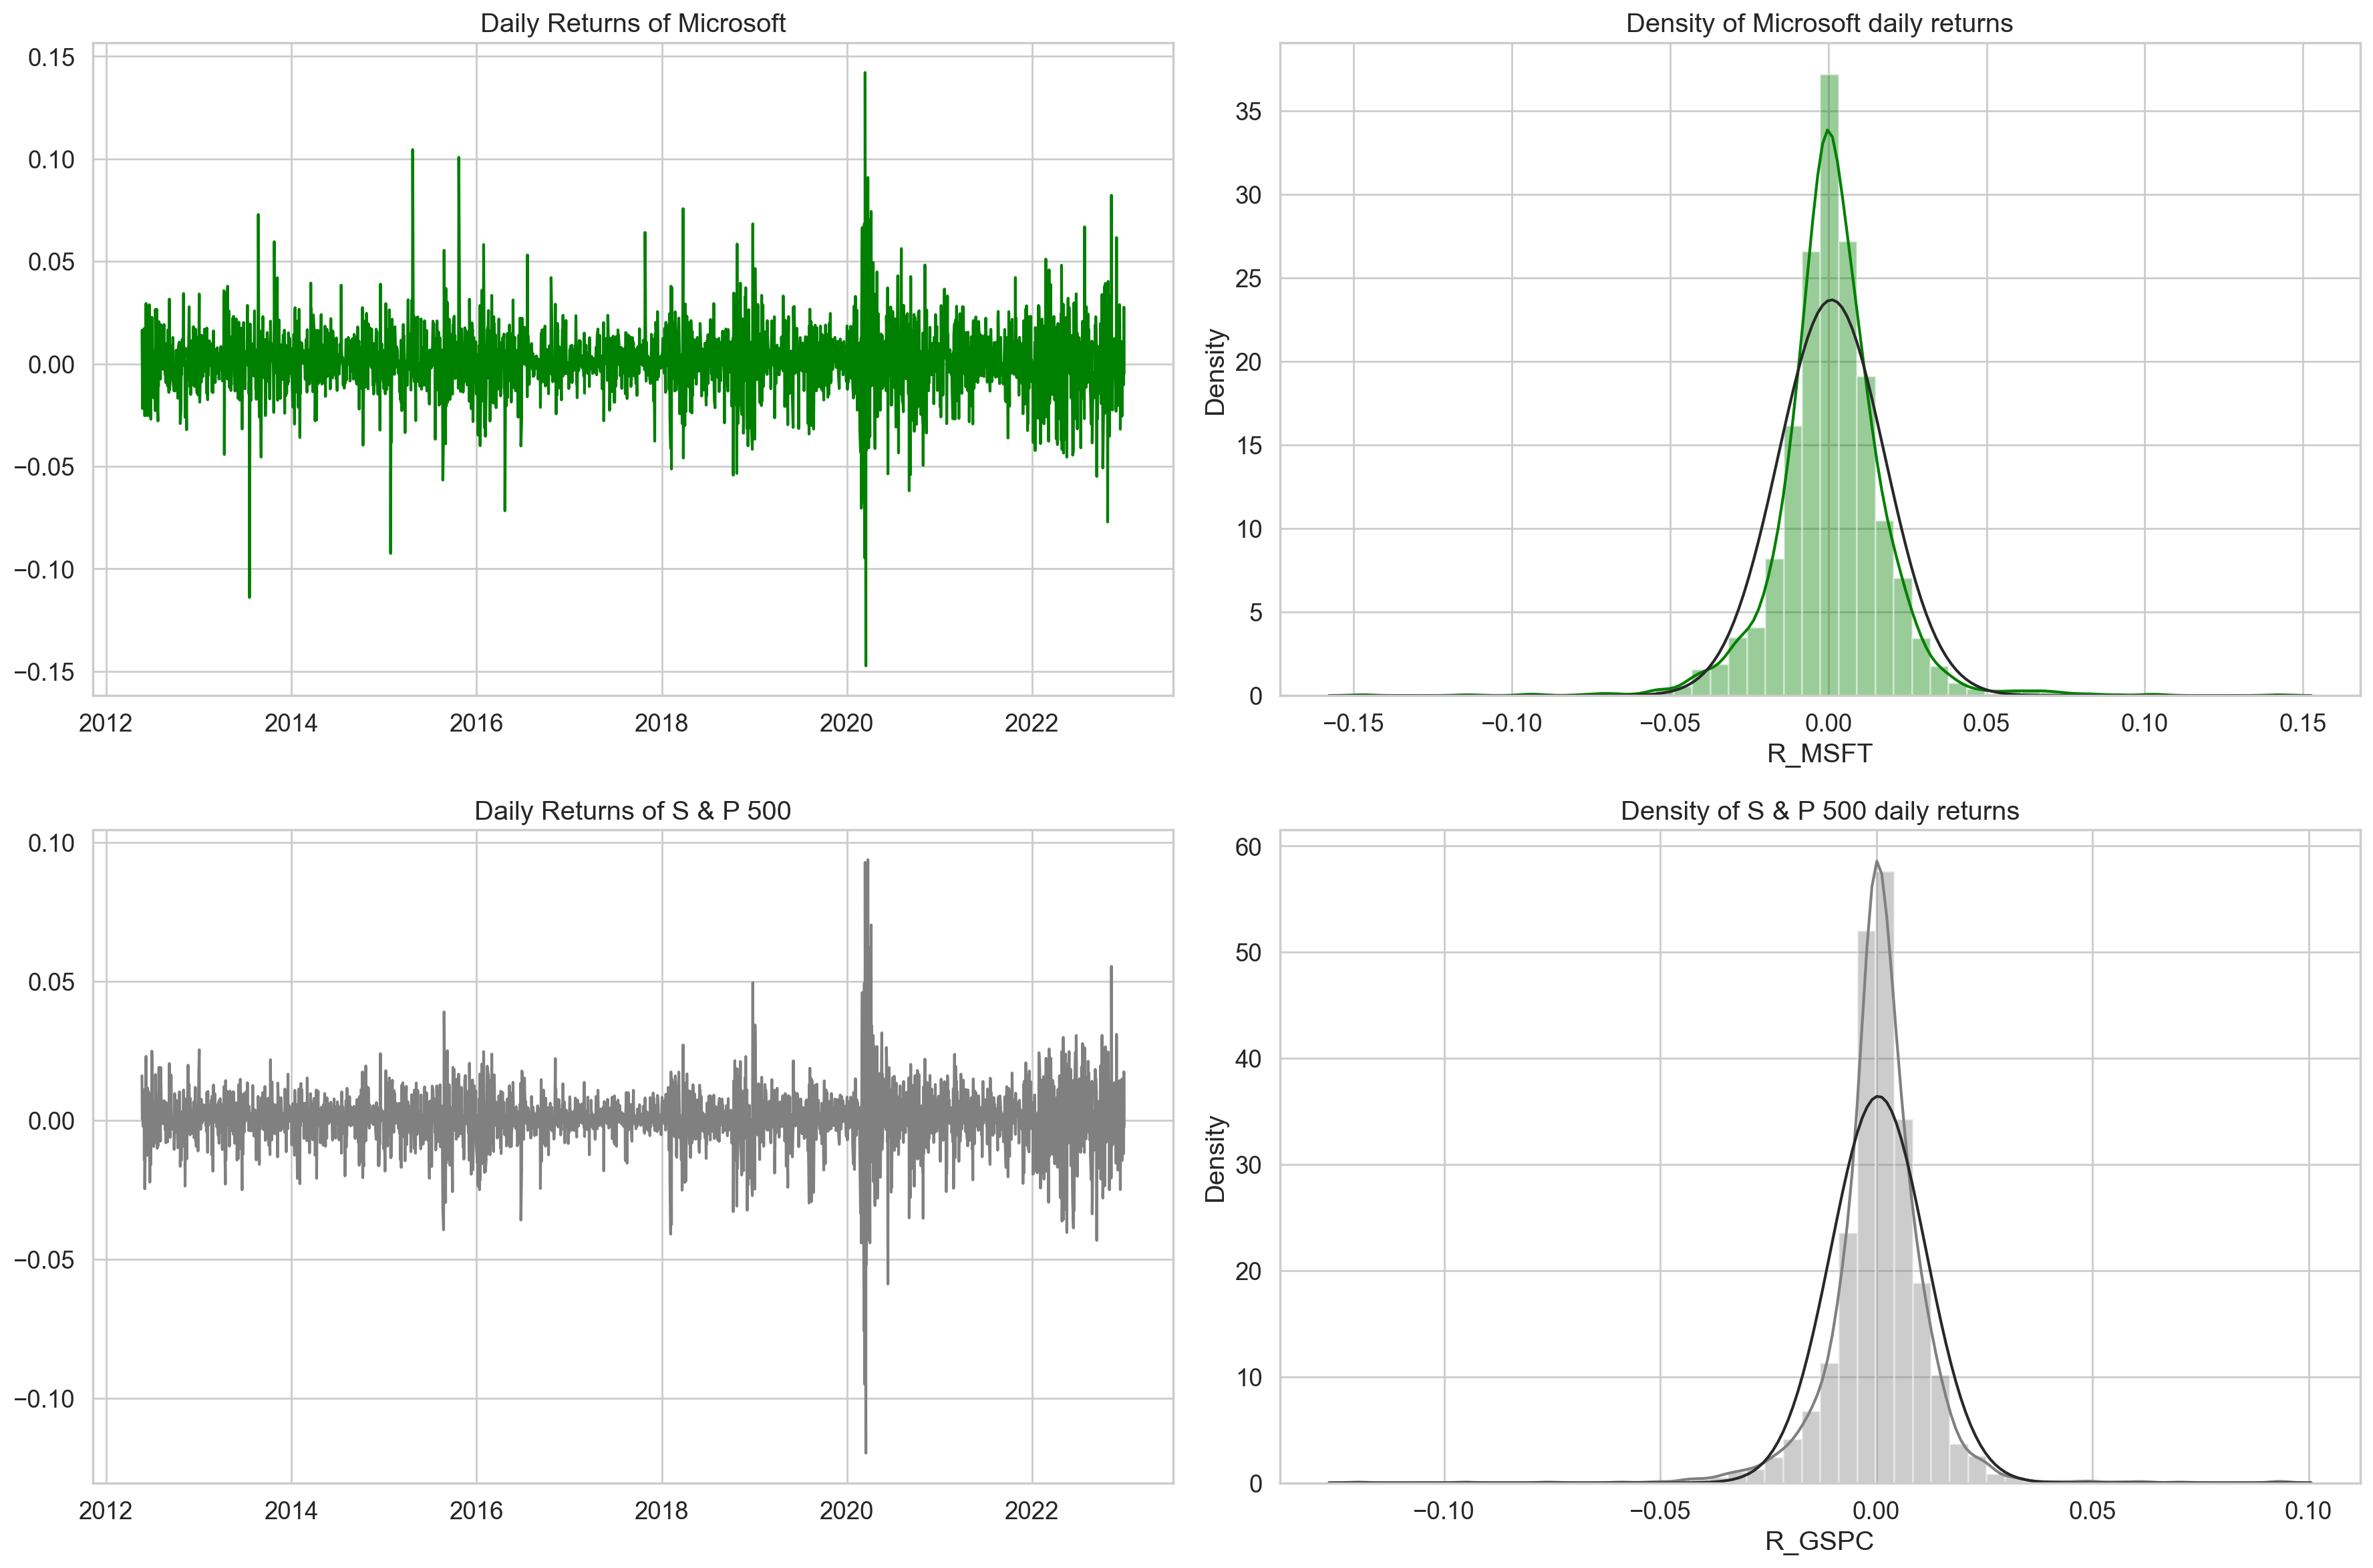

In [19]:
from scipy import stats
with sns.axes_style("whitegrid"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18,12))
    axes[0][0].plot(dataset['R_MSFT'], color='green')
    axes[0][0].set_title('Daily Returns of Microsoft')
    sns.distplot(dataset['R_MSFT'], norm_hist=True, fit=stats.norm, color='green',
    bins=50, ax=axes[0][1])
    axes[0][1].set_title('Density of Microsoft daily returns')
    axes[1][0].plot(dataset['R_GSPC'], color='grey')
    axes[1][0].set_title('Daily Returns of S & P 500')
    sns.distplot(dataset['R_GSPC'], norm_hist=True, fit=stats.norm, color='grey',
    bins=50, ax=axes[1][1])
    axes[1][1].set_title('Density of S & P 500 daily returns')
    plt.tight_layout()
    #fig.show();
    plt.show()
    fig.savefig('test1')

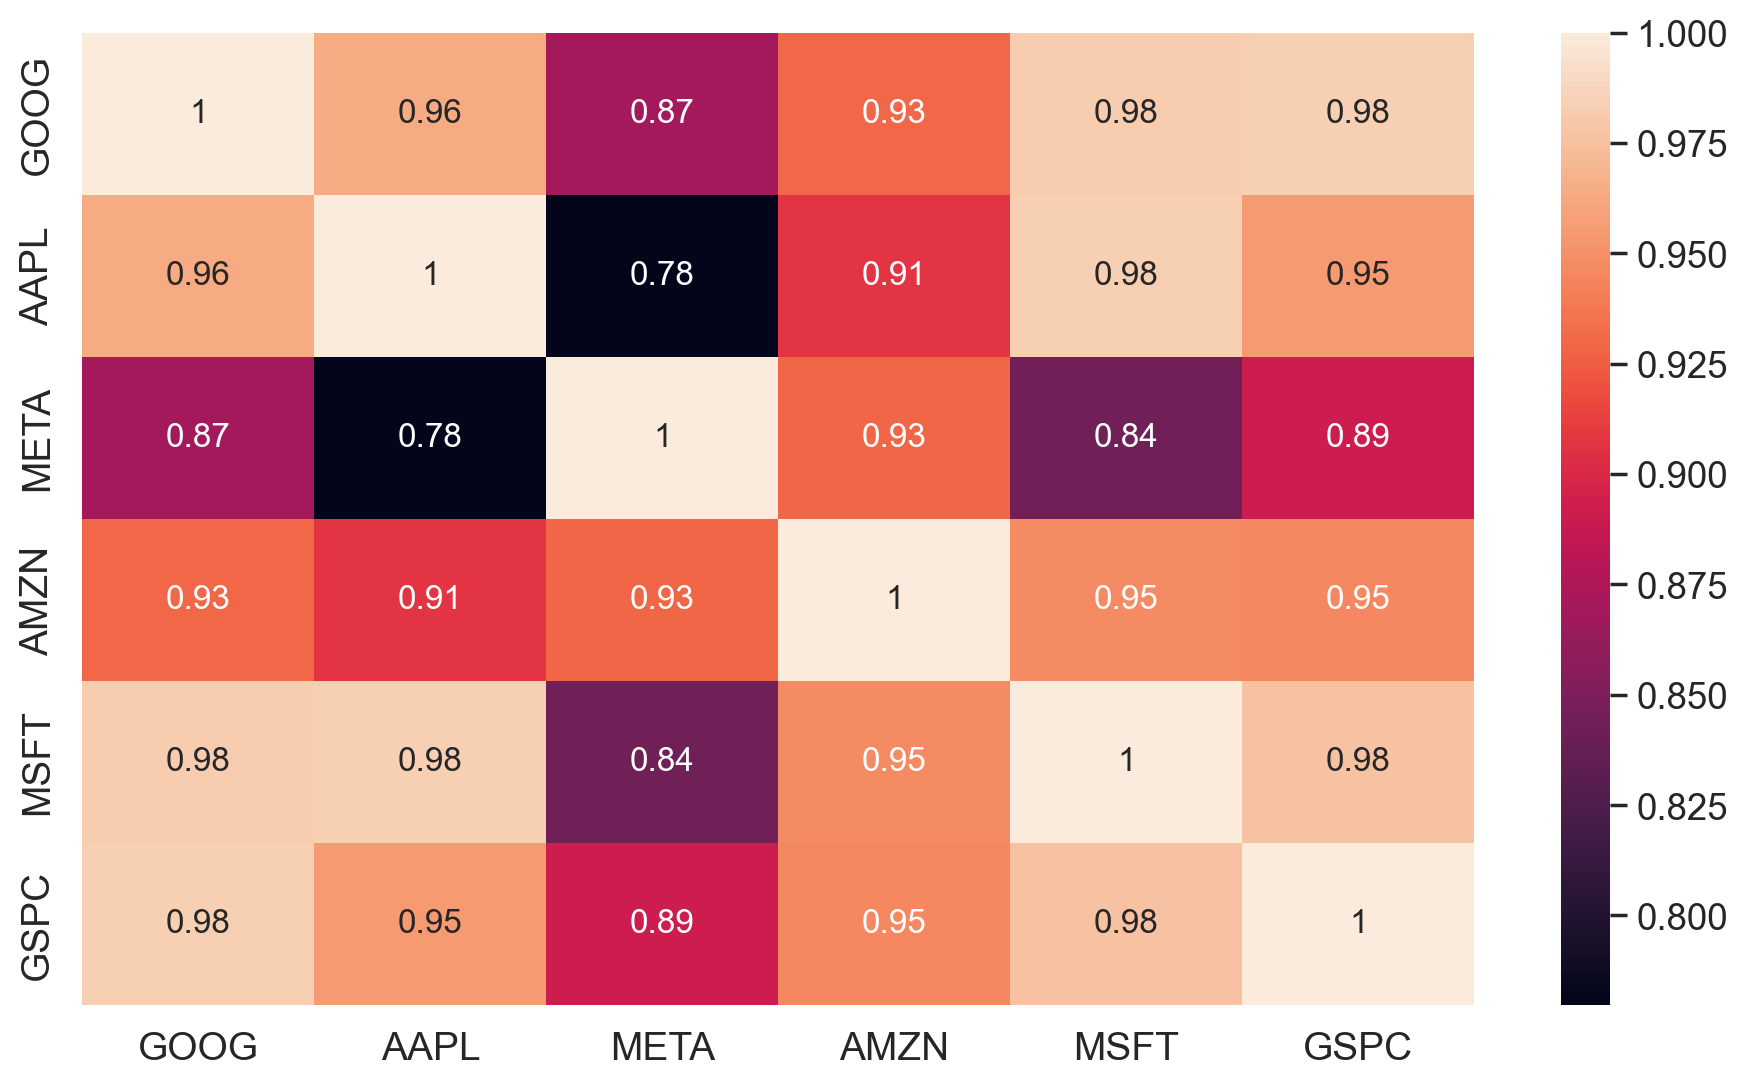

In [20]:
corr = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

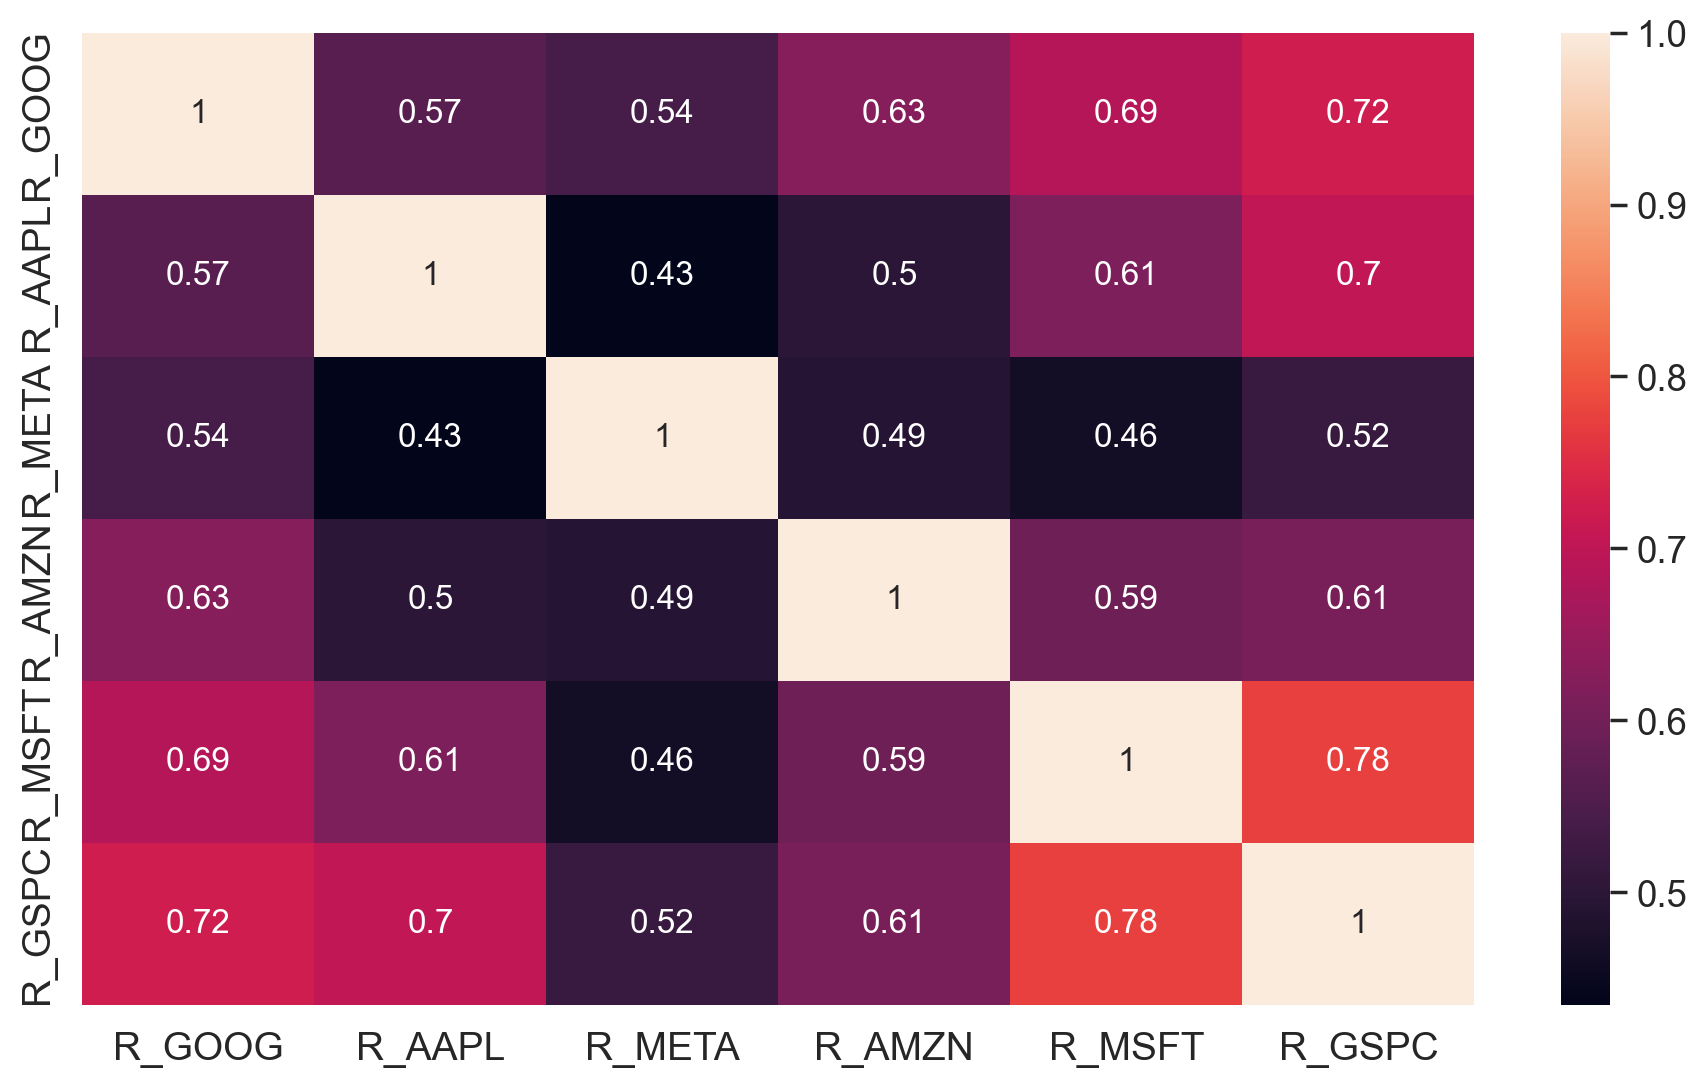

In [21]:
corr = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']].corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':12})
heat_map=plt.gcf()
heat_map.set_size_inches(10,6)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt. show()

In [22]:
returns = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 252
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per year')

The volatility of the stock of R_GOOG = 26.82 % per year
The volatility of the stock of R_AAPL = 29.05 % per year
The volatility of the stock of R_META = 40.12 % per year
The volatility of the stock of R_AMZN = 32.28 % per year
The volatility of the stock of R_MSFT = 26.73 % per year
The volatility of the stock of R_GSPC = 17.39 % per year


In [23]:
returns = dataset[['R_GOOG','R_AAPL','R_META','R_AMZN','R_MSFT', 'R_GSPC']]
n_days = 21
for col in returns.columns:
    print("The volatility of the stock of", col, "=",round(returns[col].std()*np.sqrt(n_days)*100,2), '% per month')

The volatility of the stock of R_GOOG = 7.74 % per month
The volatility of the stock of R_AAPL = 8.39 % per month
The volatility of the stock of R_META = 11.58 % per month
The volatility of the stock of R_AMZN = 9.32 % per month
The volatility of the stock of R_MSFT = 7.72 % per month
The volatility of the stock of R_GSPC = 5.02 % per month


In [24]:
n_days = 252
def sharpe_ratio (serie, rf = 0.025):
    ''''
    serie : Series of daily returns of the stock or portfolio
    rf: annual return on a risk-free investment (default rf=0.025)
    '''''
    # Mean Annualized Return
    rp = serie.mean()*n_days
    # Annual volatility
    volatility = serie.std()*np.sqrt(n_days)
    # Sharpe ratio
    sharpe = (rp -rf ) / volatility
    return sharpe

In [25]:
# Let's consider a risk-free investment with an annual return of 2.5% and
#we calculate the Sharpe Ratio of each stock
for col in returns.columns:
    print("The Sharpe ratio of,", col,"=", round(sharpe_ratio(returns[col]),2 ))

The Sharpe ratio of, R_GOOG = 0.67
The Sharpe ratio of, R_AAPL = 0.74
The Sharpe ratio of, R_META = 0.41
The Sharpe ratio of, R_AMZN = 0.69
The Sharpe ratio of, R_MSFT = 0.86
The Sharpe ratio of, R_GSPC = 0.53


In [26]:
cov = returns.cov() * 12 # annualized
cov

R_GOOG    R_AAPL    R_META    R_AMZN    R_MSFT    R_GSPC
R_GOOG  0.003426  0.002098  0.002770  0.002577  0.002346  0.001607
R_AAPL  0.002098  0.004020  0.002412  0.002236  0.002273  0.001689
R_META  0.002770  0.002412  0.007665  0.003033  0.002359  0.001728
R_AMZN  0.002577  0.002236  0.003033  0.004962  0.002431  0.001623
R_MSFT  0.002346  0.002273  0.002359  0.002431  0.003402  0.001719
R_GSPC  0.001607  0.001689  0.001728  0.001623  0.001719  0.001440

In [27]:
beta_GOOG = cov.iloc[0,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Google is : {beta_GOOG}')

Beta (10Y period) of Google is : 1.1160955761890359


In [28]:
beta_AAPL = cov.iloc[1,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Apple is : {beta_AAPL}')

Beta (10Y period) of Apple is : 1.1729649078875979


In [29]:
beta_META = cov.iloc[2,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Facebook is : {beta_META}')

Beta (10Y period) of Facebook is : 1.200017601883428


In [30]:
beta_AMZN = cov.iloc[3,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Amazon is : {beta_AMZN}')

Beta (10Y period) of Amazon is : 1.127099926299393


In [31]:
beta_MSFT = cov.iloc[4,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of Microsoft is : {beta_MSFT}')

Beta (10Y period) of Microsoft is : 1.1938837988348259


In [32]:
beta_GSPC = cov.iloc[5,5] / cov.iloc[5,5]
print(f'Beta (10Y period) of S&P 500 is : {beta_GSPC}')

Beta (10Y period) of S&P 500 is : 1.0


In [33]:
from scipy.optimize import minimize

In [34]:
# Portfolio Simulation
portfolio = 2673 # generation of a portfolio
n_assets = returns.shape[1]
weights = np.random.dirichlet(np.full(n_assets,0.05),portfolio)
mean_returns = returns.mean()
sigma = returns.cov()
expected_returns = np.zeros(portfolio)
expected_vol = np.zeros(portfolio)
sharpe_ratio = np.zeros(portfolio)
rf_rate = 0.0 # risk free rate
for i in range(portfolio):
    w = weights[i,:]
    expected_returns[i] = np.sum(mean_returns @ w)*252
    expected_vol[i] = np.sqrt(np.dot(w.T,sigma @ w))*np.sqrt(252)
    sharpe_ratio[i] = (expected_returns[i]-rf_rate)/expected_vol[i]

In [35]:
def portfolio_volatility(weight):
    return np.sqrt(np.dot(weight.T, 
                        np.dot(sigma,weight)))*np.sqrt(252)

def portfolio_return(weight):
    return np.sum(mean_returns*weight)*252

def portfolio_performance(weight):
    return_p = portfolio_return(weight)
    vol_p = portfolio_volatility(weight)
    return return_p, vol_p

In [36]:
def negativeSR(weight):
    return_p, vol_p = portfolio_performance(weight)
    rf_rate = 0.025
    return -(return_p - rf_rate)/vol_p

def max_sharpe_ratio():
    
    def sum_one(weight):
        w= weight
        return np.sum(weight)-1
    n_assets = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': sum_one})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist() # w0 is an initila guess

    return minimize(negativeSR,w0,method='SLSQP',
        bounds =((0,1),)*n_assets,
        constraints = weight_constraints)

In [37]:
def min_vol():
    n_assets = returns.shape[1]
    weight_constraints = ({'type':'eq','fun': lambda x: np.sum(x)-1})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds = ((0,1),)*n_assets
    return minimize(portfolio_volatility,w0,method='SLSQP',
        bounds = bounds,
        constraints = weight_constraints)

In [38]:
def efficient_portfolio_target(target):
    constraints = ({'type':'eq','fun': lambda x: portfolio_return(x)- target},
    {'type' :'eq','fun': lambda x: np.sum(x)-1})
    w0 = np.random.dirichlet(np.full(n_assets,0.05)).tolist()
    bounds = ((0,1),)*n_assets
    return minimize(portfolio_volatility,w0, method = 'SLSQP',
        bounds = bounds,
        constraints = constraints)

In [39]:
def efficient_frontier(return_range):
    return [efficient_portfolio_target(ret) for ret in return_range]

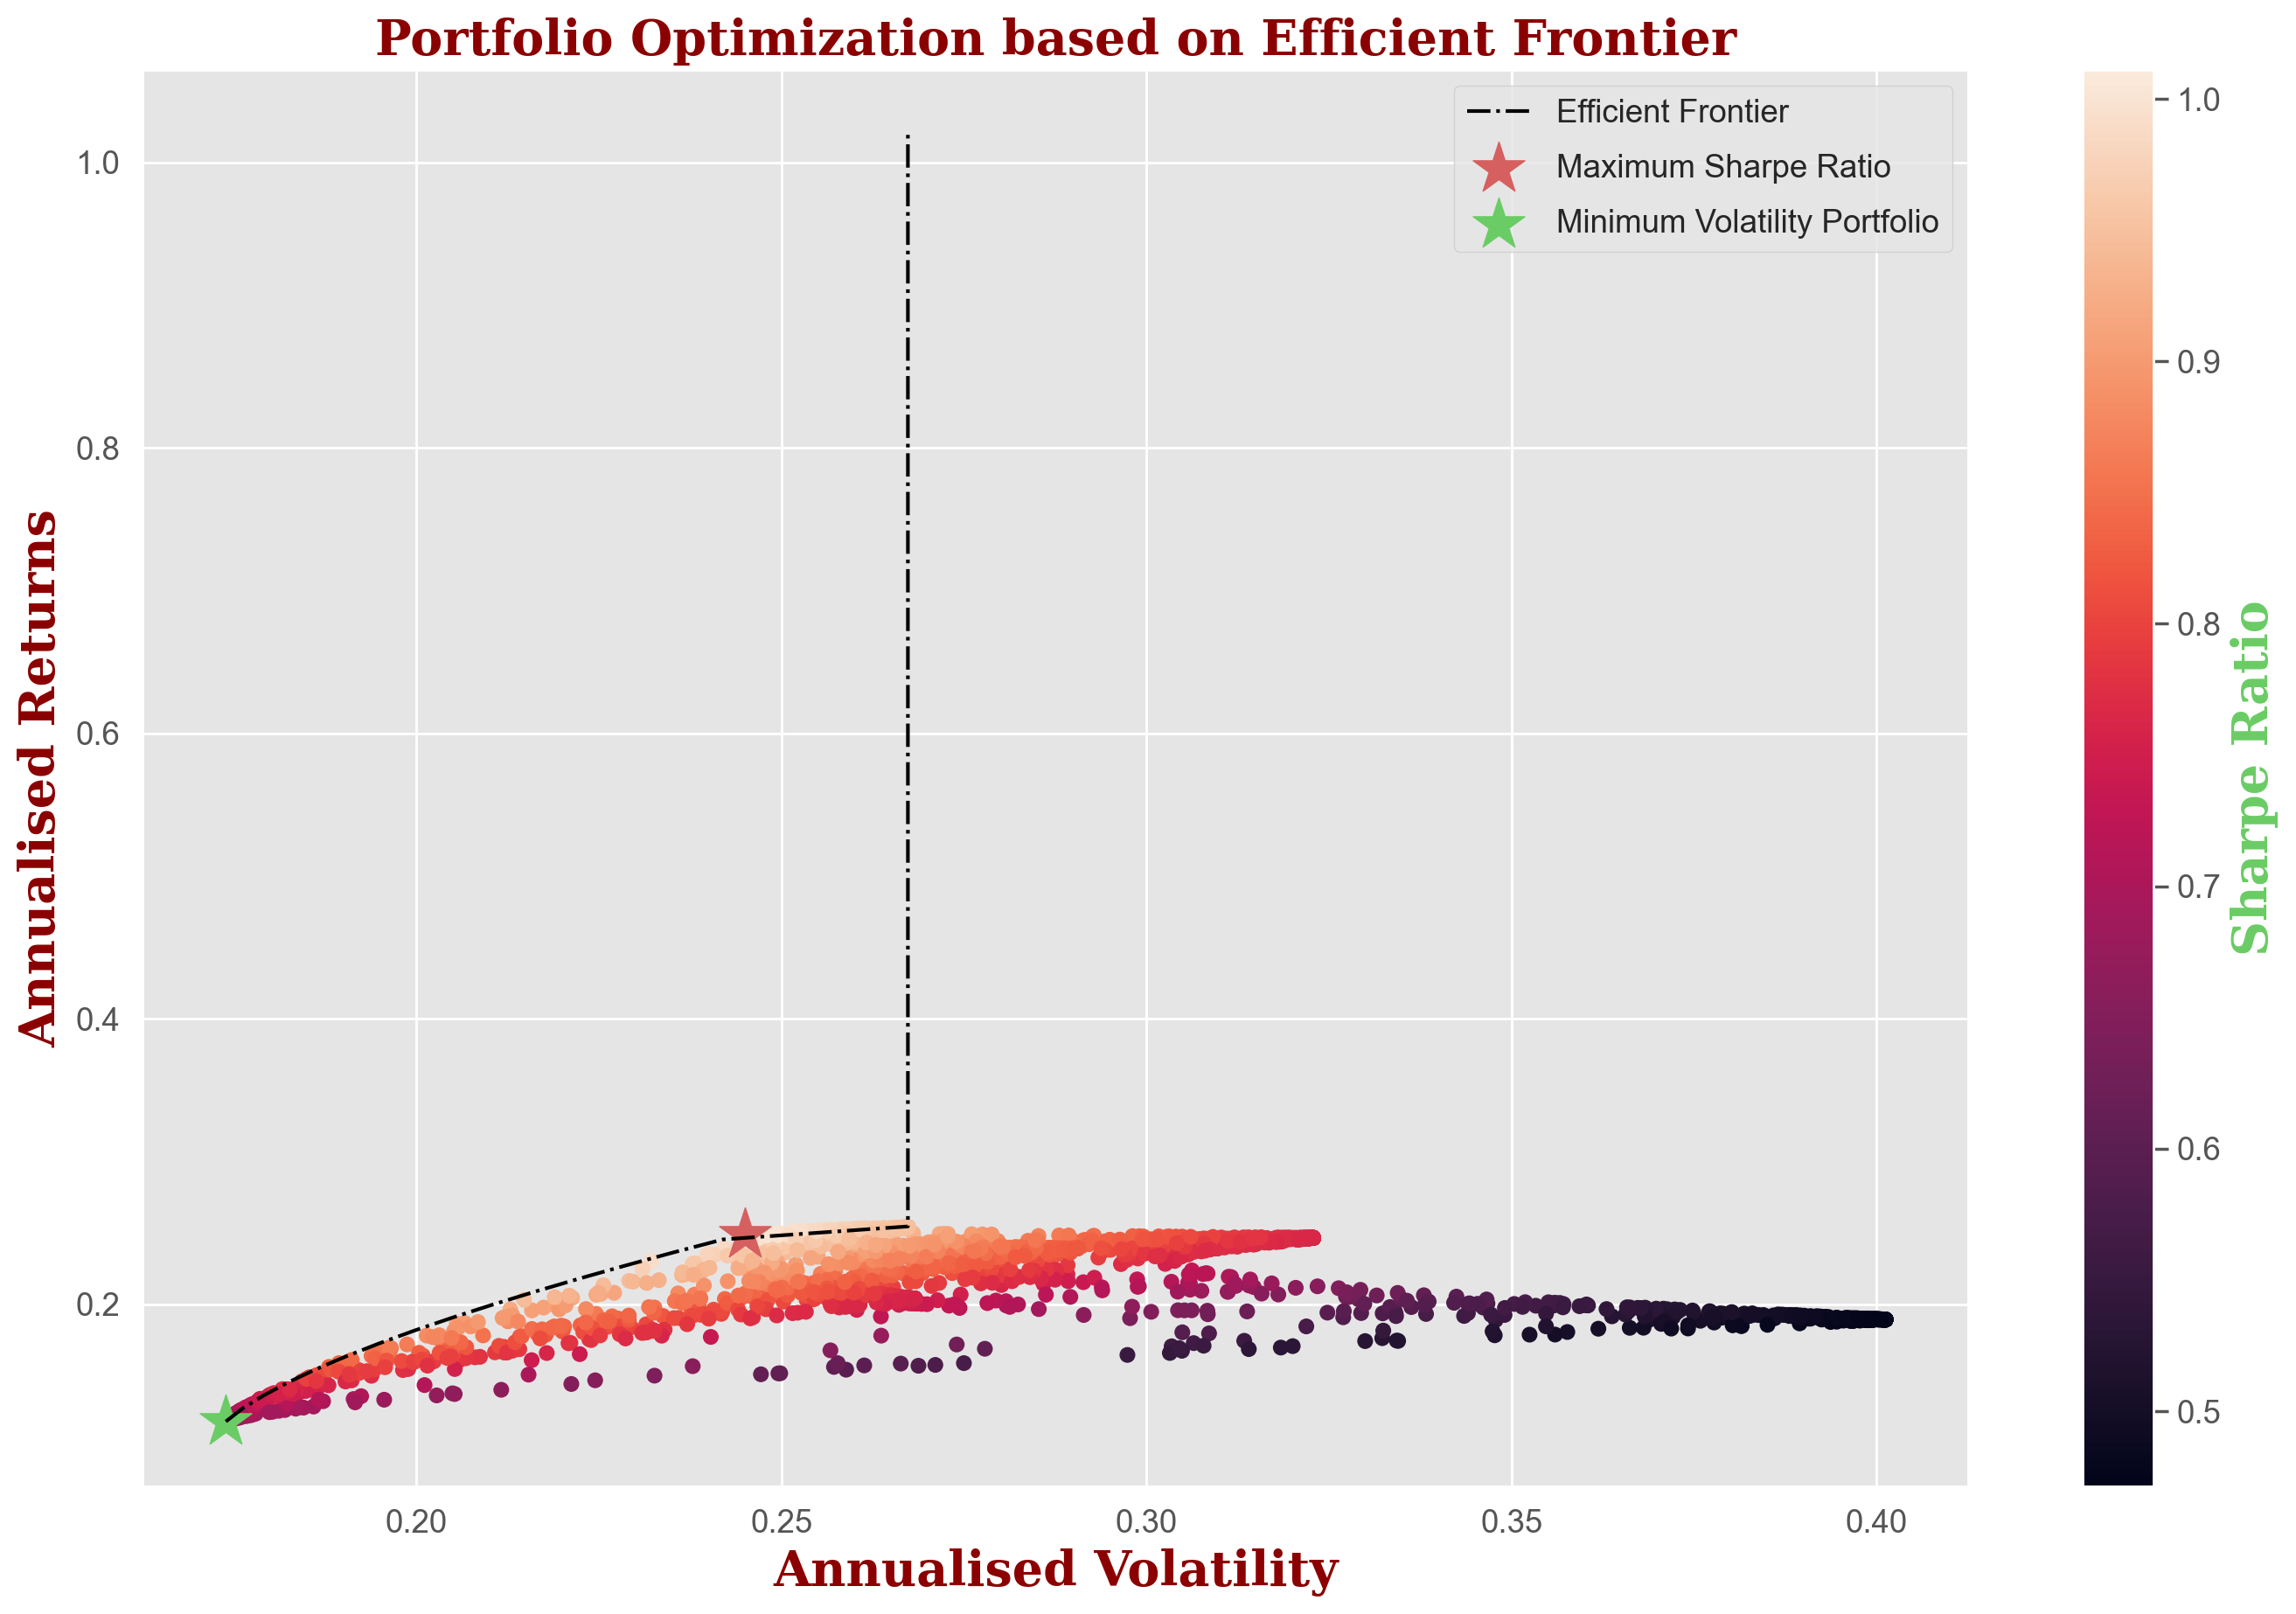

In [40]:
sharpe_maximum = max_sharpe_ratio()
return_p,vol_p = portfolio_performance(sharpe_maximum['x'])
min_volatility = min_vol()
return_min,vol_min = portfolio_performance(min_volatility['x'])

plt.figure(figsize =(15,10))
plt.style.use('ggplot')
plt.scatter(expected_vol,expected_returns, c = sharpe_ratio)
# plt.colorbar.sel(label = 'Sharpe Ratio',size=20)
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target = np.linspace(return_min,1.02,100)
efficient_portfolios = efficient_frontier(target)
plt.plot([i.fun for i in efficient_portfolios], target, linestyle ='dashdot', color ='black',
label='Efficient Frontier')
plt.scatter(vol_p,return_p, c = 'r', marker='*', s = 500, label = 'Maximum Sharpe Ratio')
plt.scatter(vol_min,return_min, c = 'g', marker ='*', s = 500, label='Minimum Volatility Portfolio')

font1 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
font2 = {'family':'serif','color':'darkred','size':20,'weight':'bold'}
plt.title('Portfolio Optimization based on Efficient Frontier',fontdict=font1)
plt.xlabel('Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
plt.legend(labelspacing=0.8)

In [41]:
def calc_portfolio_perf(weights, mean_returns, cov, rf):# portfolio performance, calculate the annualised return, sharpe ratio
    portfolio_return = np.sum(mean_returns*weights)*252 #252 working days at the stock exchange
    portfolio_std = np.sqrt(np.dot(weights.T,np.dot(cov,weights)))*np.sqrt(252) # np.dot multiplication of matrices
    sharpe_ratio = (portfolio_return - rf) / portfolio_std
    return portfolio_return, portfolio_std, sharpe_ratio

def simulate_random_portfolios(num_portfolios, mean_returns, cov, rf): # random simulation
    results_matrix = np.zeros((len(mean_returns)+3, num_portfolios))
    for i in range(num_portfolios):
        weights=np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        portfolio_return, portfolio_std, sharpe_ratio = calc_portfolio_perf(weights, mean_returns, cov, rf)
        results_matrix[0,i] = portfolio_return
        results_matrix[1,i] = portfolio_std
        results_matrix[2,i] = sharpe_ratio
        #iterate through the weight vector and add data to results array

        for j in range(len(weights)):
            results_matrix[j+3,i] = weights[j]

    results_df = pd.DataFrame(results_matrix.T,columns=['ret','stdev','sharpe'] + [ticker for ticker in tickers])
    return results_df

In [42]:
tickers = []
for i in dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].columns:
    tickers.append(i)

In [43]:
mean_returns = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().mean()
cov = dataset[['GOOG','AAPL','META','AMZN','MSFT', 'GSPC']].pct_change().cov()
num_portfolios = 10000
rf = 0.025
results_frame =simulate_random_portfolios(num_portfolios, mean_returns,cov, rf) #random selection/creation of the portfolio

In [44]:
results_frame.sum(axis=1)-results_frame["ret"]-results_frame["stdev"]-results_frame["sharpe"];

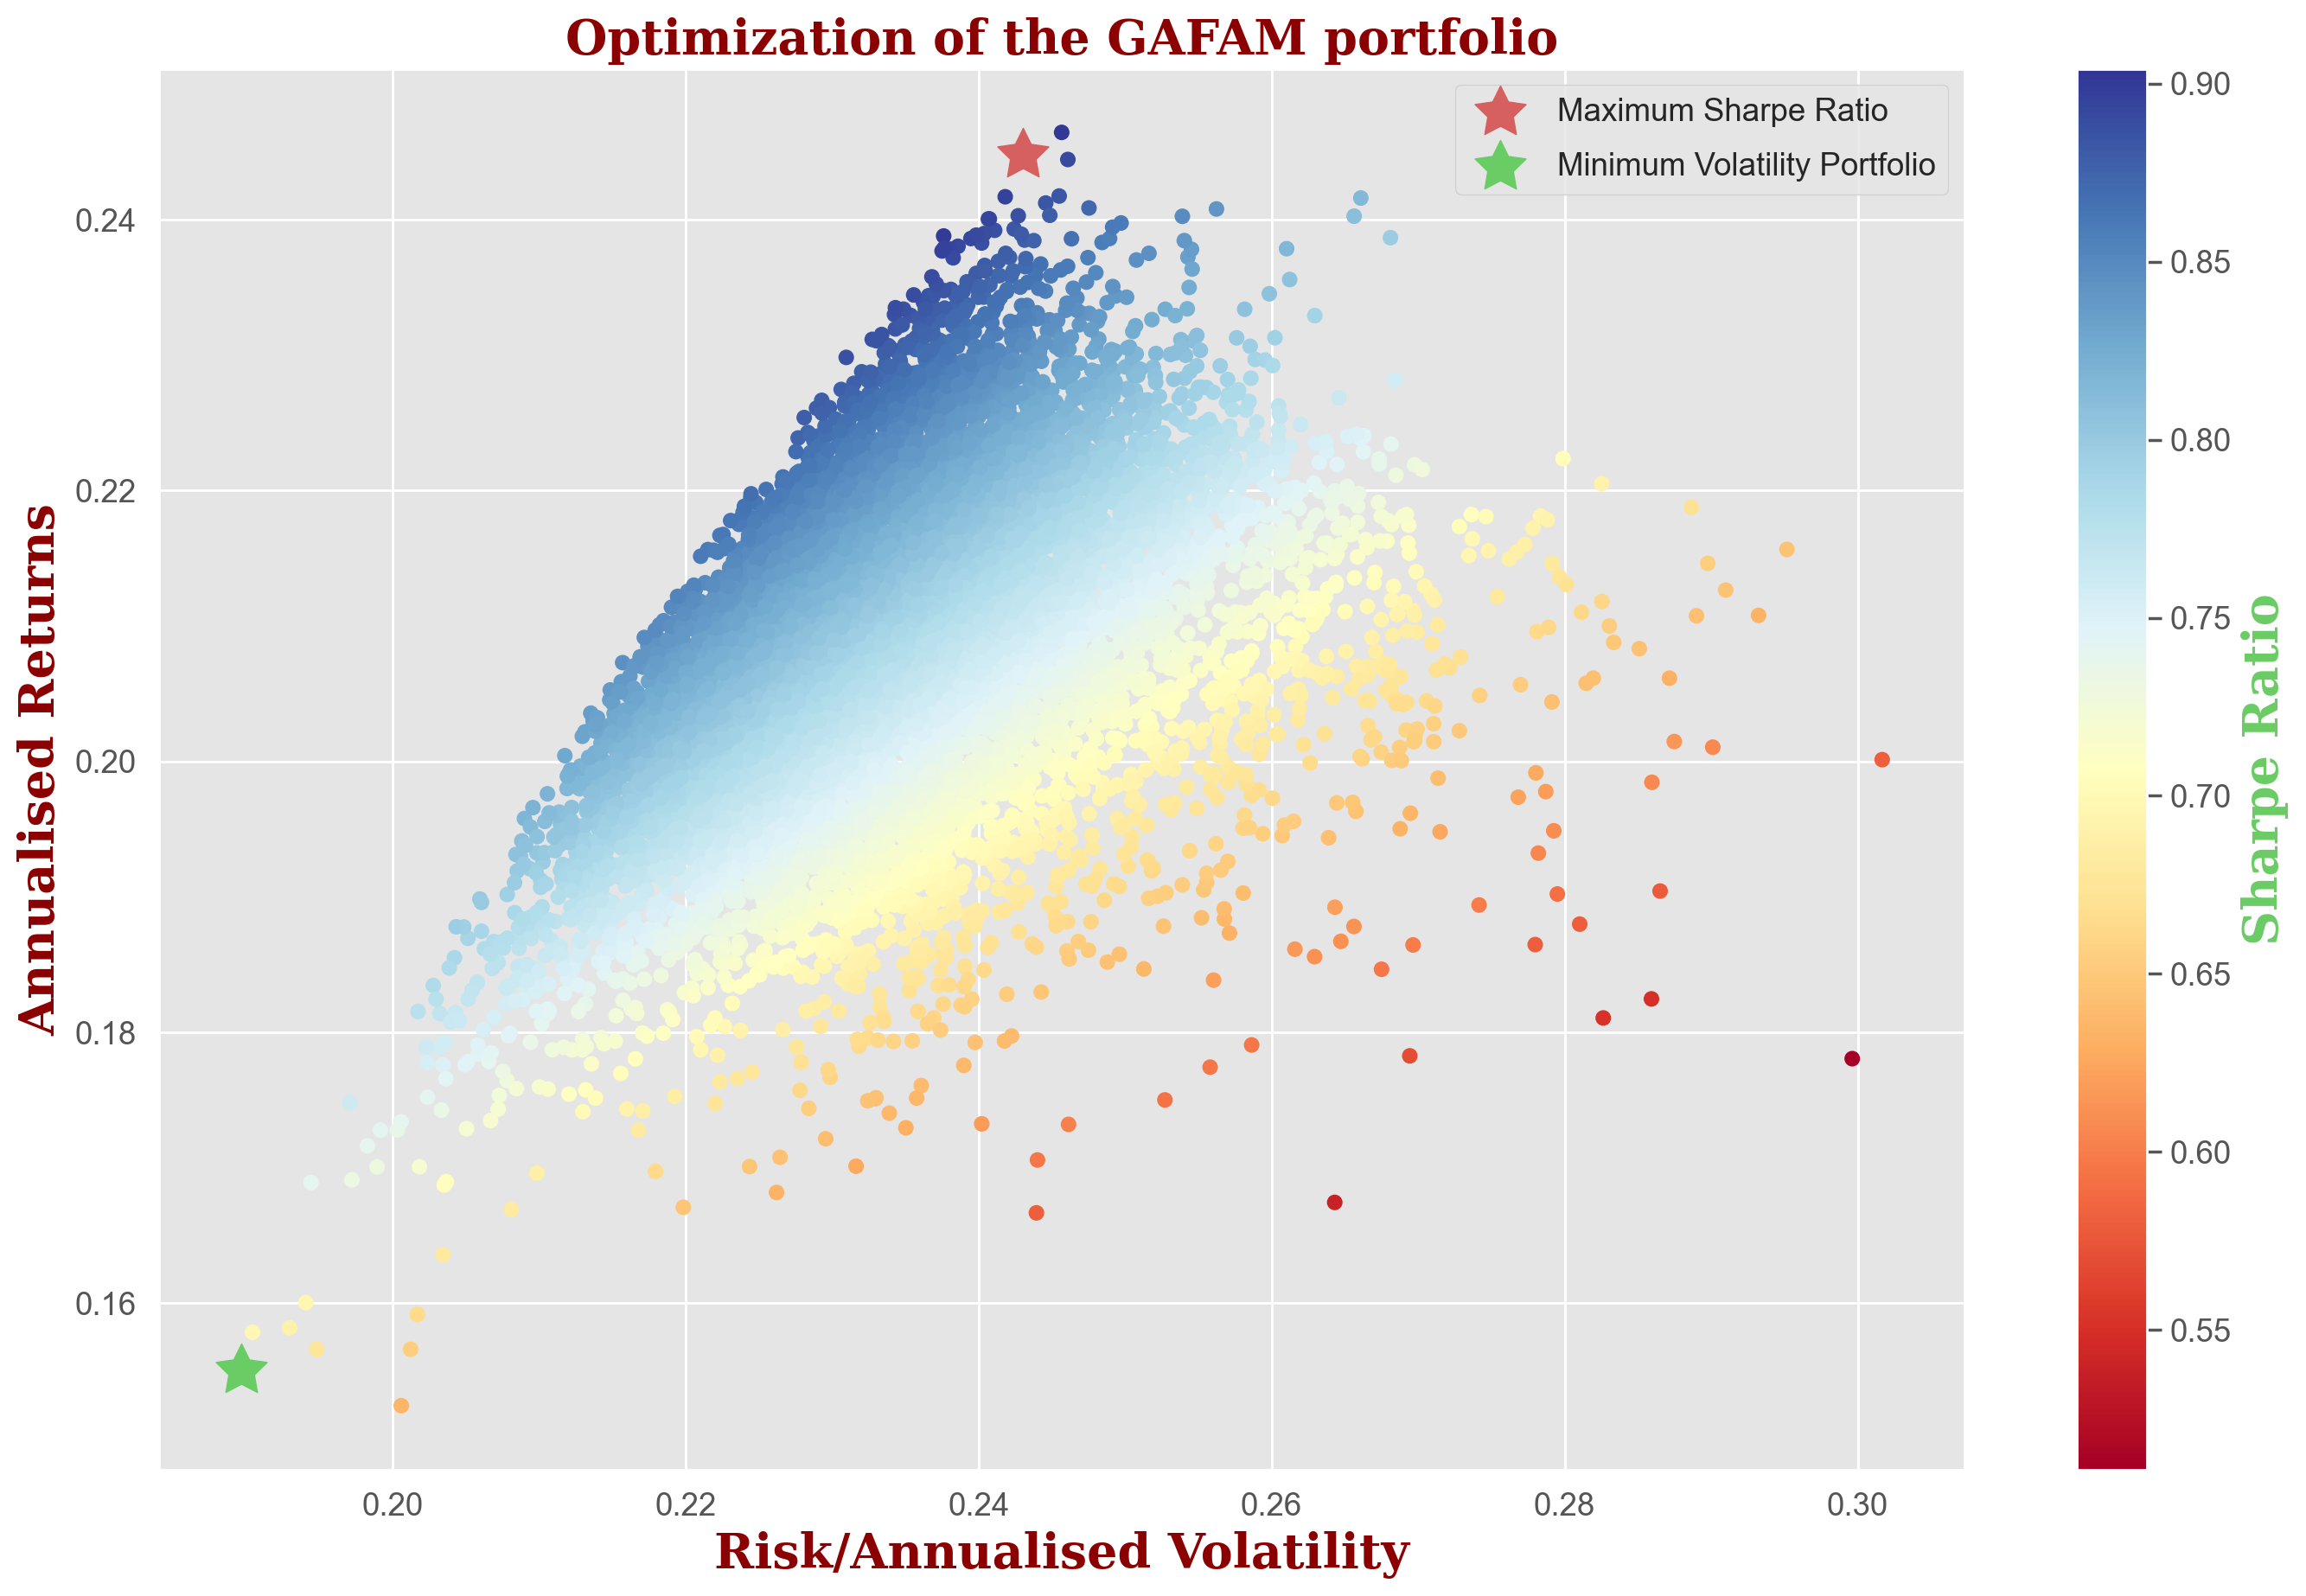

In [45]:
#Locate position of portfolio with highest Sharpe Ratio
max_sharpe_port=results_frame.iloc[results_frame["sharpe"].idxmax()] # max sharp ratio rouge
#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame["stdev"].idxmin()] # min volatility = min variance portfolio vert
#create scatter plot coloured by Sharpe Ratio
plt.subplots(figsize=(15,10)) # Number of rows/colums of the subplot grid
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu') #Colormaps in Matplotlib
plt.title('Optimization of the GAFAM portfolio',fontdict=font1)
plt.xlabel('Risk/Annualised Volatility',fontdict=font2)
plt.ylabel('Annualised Returns',fontdict=font2)
#plt.colorbar () # match the colorbar
plt.colorbar().set_label('Sharpe Ratio', size= 20, color = 'g', family='serif',weight='bold')
target = np.linspace(return_min,1.02,100)
#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=500, label = 'Maximum Sharpe Ratio')
#plot green star to highlight position of minimum vartance portfolio
plt.scatter(min_vol_port[1] ,min_vol_port[0],marker=(5,1,0),color='g', s=500, label='Minimum Volatility Portfolio')
plt.legend(labelspacing=0.8)
plt.savefig('Portfolio_Optimization_Efficient_Frontier.pdf')
plt.show()

In [46]:
max_sharpe_port.to_frame().T # portfolio with the highest Sharpe ratio. it is negative when the investment return is Lower than

ret     stdev    sharpe      GOOG      AAPL      META      AMZN  \
3270  0.24477  0.243055  0.904201  0.011955  0.269486  0.034679  0.209609   

          MSFT      GSPC  
3270  0.469536  0.004734

In [47]:
min_vol_port.to_frame().T #portfolio with the Lowest variance portfolio

ret     stdev    sharpe      GOOG     AAPL      META      AMZN  \
2695  0.155058  0.189667  0.685718  0.129409  0.07794  0.052775  0.016958   

          MSFT      GSPC  
2695  0.079501  0.643417